In [1]:
from src.HestonModel import generate_heston_paths
import numpy as np
import esig
import matplotlib.pyplot as plt
import iisignature
import signatory
import torch
from tqdm.auto import tqdm

In [2]:
# constant Heston parameters
kappa = 3
theta = 0.02
v_0 = theta #
rho = 0.75
sigma = 0.6
r = 0.04

S = 100
paths = 10000
steps = 50
T = 1

In [3]:
# Get Heston prices and volatilises
prices, sigs = generate_heston_paths(S, T, r, kappa, theta, v_0, rho, sigma, steps, paths, return_vol=True)

In [4]:
prices.shape

(10000, 50)

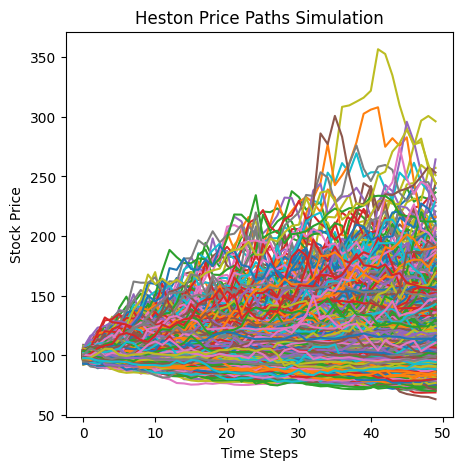

In [5]:
# Plot Heston Price paths
plt.figure(figsize=(5, 5))
plt.plot(prices.T)
plt.title('Heston Price Paths Simulation')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.show()


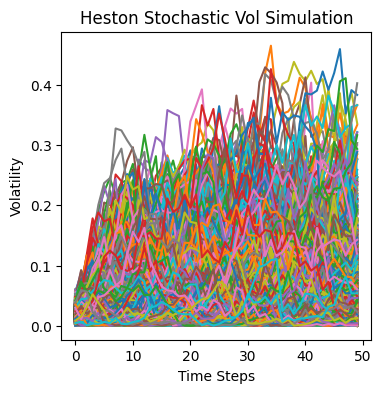

In [6]:
# Plot Heston volatility paths
plt.figure(figsize=(4, 4))
plt.plot(sigs.T)
plt.title('Heston Stochastic Vol Simulation')
plt.xlabel('Time Steps')
plt.ylabel('Volatility')
plt.show()

In [7]:
#############################################################################################

In [7]:
thetas=0.2 #Long run variance θ
kappas= 2 # Mean reversion κ
v_0s = thetas #  Initial variance
rhos = 0.6 #Correlation ρ, correlation between the log-returns and volatility of the asset
sigmas = 0.6 #Volatility of variance σ
rs = 0.04

S = 100
paths = 10000
steps = 100
T = 1

In [10]:
by_parameter = {
    # "by_thetas": np.arange(0.01,0.8,0.0015),  # list to store 500 elements for var1
    "by_rs": np.arange(0.01,0.15,0.00028),  # list to store 500 elements for var2
    "by_rhos": np.arange(0.0,1.1,0.002),  # list to store 550 elements for var3
    "by_sigmas": np.arange(0.0,1.1,0.002),  # list to store 550 elements for var4
    "by_kappas": np.arange(.5,5.0,0.01),   # list to store 450 elements for var5
    "by_thetas": np.arange(0.01,0.8,0.0015)  # list to store 450 elements for var1
}

In [10]:
by_parameter["by_thetas"].shape

(527,)

In [11]:
# list12=["kappas","thetas"]
# list12

In [34]:
# def draft_funct(thetas1,kappas1, lambdas1):
#     answ=thetas1+kappas1+lambdas1
#     return answ
#
# cond1=2
# val1=1
# cond2=3
# val2=100
# cond3=4
# val3=1000
# for cond in range(2,5,1):
#     for val1 in range(1,5,1):
#         res=  draft_funct(thetas1=val1 if cond1==cond else 3,kappas1=val2 if cond2==cond else 300,lambdas1=val3 if cond3==cond else 3000)
#
# by_parameter123 = {
#     "thetas1": [1, 2, 3],
#     "kappas1": [0.1, 0.2, 0.3],
#     "lambdas1": [100, 200, 300]
# }
# list123 = ["thetas","kappas"]
#
# for key, value in by_parameter123.items():
#     if key in list123:
#         for value in by_parameter123[key]:
#             for subvalue in value:
#                 otvet=draft_funct(thetas1=subvalue if key=='thetas' else thetas, kappas1=subvalue if key=='kappas' else kappas, lambdas=subvalue if key=='lambdas' else sigmas)


In [35]:
# list12=["by_kappas","by_thetas"]
# for key,value in by_parameter.items() :
#     if key in list12:
#         for value in by_parameter[key]:
#          print("The parameter " + key + " has values " + str(value))

In [11]:
depth_of_sig=2  #level of truncation of signatures
width_of_sig=3  # prices + sigmas + time_array (parameters for signatures)
sig_keys = esig.sigkeys(width_of_sig, depth_of_sig)
sig_dim=signatory.signature_channels(width_of_sig,depth_of_sig)

In [12]:
# define time_array and empty tensor for prices and sigmas, signatures and expected signatures
time_array = np.arange(steps)
prices_and_sigs_with_time_tensor = torch.zeros((paths,steps, width_of_sig ))
# thetas
number_of_loops_thetas=by_parameter["by_thetas"].shape[0]
sign_ps_signatory_differentranges_thetas=torch.zeros((number_of_loops_thetas,paths,sig_dim))
Exp_sign_signatory_results_thetas=torch.zeros((number_of_loops_thetas,sig_dim))
# sigmas
number_of_loops_sigmas=by_parameter["by_sigmas"].shape[0]
sign_ps_signatory_differentranges_sigmas=torch.zeros((number_of_loops_sigmas,paths,sig_dim))
Exp_sign_signatory_results_sigmas=torch.zeros((number_of_loops_sigmas,sig_dim))
# kappas
number_of_loops_kappas=by_parameter["by_kappas"].shape[0]
sign_ps_signatory_differentranges_kappas=torch.zeros((number_of_loops_kappas,paths,sig_dim))
Exp_sign_signatory_results_kappas=torch.zeros((number_of_loops_kappas,sig_dim))
# rhos
number_of_loops_rhos=by_parameter["by_rhos"].shape[0]
sign_ps_signatory_differentranges_rhos=torch.zeros((number_of_loops_rhos,paths,sig_dim))
Exp_sign_signatory_results_rhos=torch.zeros((number_of_loops_rhos,sig_dim))
# rs
number_of_loops_rs=by_parameter["by_rs"].shape[0]
sign_ps_signatory_differentranges_rs=torch.zeros((number_of_loops_rs,paths,sig_dim))
Exp_sign_signatory_results_rs=torch.zeros((number_of_loops_rs,sig_dim))

sign_ps_signatory_differentranges_rs[0].shape
number_of_loops_thetas
prices_and_sigs_with_time_tensor.shape
number_of_loops_thetas



# thetas=0.2 #Long run variance θ
# kappas= 2 # Mean reversion κ
# v_0s = thetas #  Initial variance
# rhos = 0.6 #Correlation ρ, correlation between the log-returns and volatility of the asset
# sigmas = 0.6 #Volatility of variance σ
# rs = 0.04

527

In [14]:
def signatures_calculations_by_parameter123(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths, parameters_list):
    count=0
    for key, value in by_parameter.items():
        if key in parameters_list:
            for value in by_parameter[key]:
                # for value in parameter_values.tolist():
                    prices_1, sigs_1 = generate_heston_paths(S, T, r=value if key=='by_rs' else rs, kappa=value if key=='by_kappas' else kappas, theta=value if key=='by_thetas' else thetas, v_0=value if key=='by_thetas' else thetas, rho=value if key=='by_rhos' else rhos, sigma=value if key=='by_sigmas' else sigmas, steps=steps, number_paths=paths, return_vol=True)

                    for j in range(paths):
                             prices_and_sigs_with_time_tensor[j] = torch.tensor([prices_1[j], sigs_1[j], time_array]).T
                          #     shape of prices_and_sigs_witout_time_tensor=torch.Size([10000, 100, 3])

                    sign_ps_signatory_differentranges_thetas[count] = signatory.signature(prices_and_sigs_with_time_tensor, depth_of_sig)
                 #     shape of  sign_ps_signatory_differentranges=torch.Size([512, 10000, 12])

                    Exp_sign_signatory_results_thetas[count] = torch.mean(sign_ps_signatory_differentranges_thetas[count], axis=0)
                 #     shape of  Exp_sign_signatory_results=torch.Size([512, 12])

                    count = count + 1

    return sign_ps_signatory_differentranges_thetas,Exp_sign_signatory_results_thetas


In [15]:
parameters_list=["by_kappas"]

In [16]:
results_parmeters123=signatures_calculations_by_parameter123(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths,parameters_list)
signatures_results_thetas123=results_parmeters123[0]
Exp_signatures_results_thetas123=results_parmeters123[1]

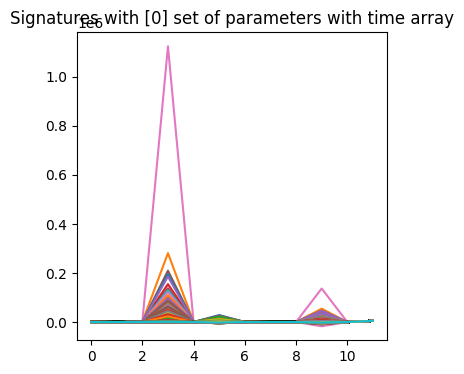

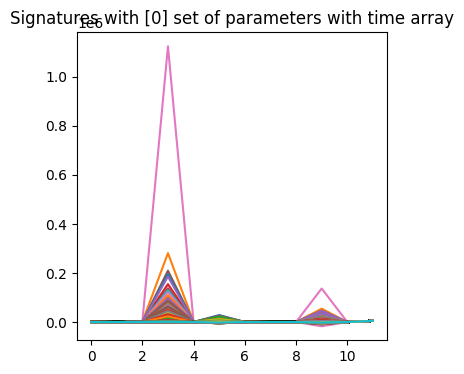

In [18]:
plt.figure(figsize=(4, 4))
plt.plot(signatures_results_thetas123[0].T)  #there are 512 sets of parameters
plt.title("Signatures with [0] set of parameters with time array")
plt.show()

In [19]:
# Exp_signatures_results_thetas123.T[i].shape
# signatures_results_thetas123.shape

In [20]:
by_parameter["by_thetas"].shape

(527,)

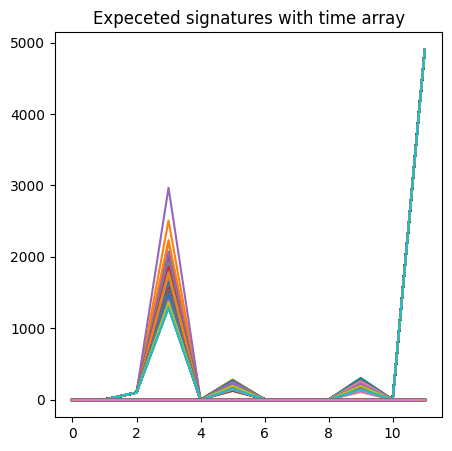

In [21]:
plt.figure(figsize=(5, 5))
plt.plot(Exp_signatures_results_thetas123.T[:])
plt.title("Expeceted signatures with time array")
plt.show()

In [45]:
# fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
# axs = axs.ravel()
# for i, ax in enumerate(axs):
#     ax.title.set_text(sig_keys.split()[i+1])
#     ax.scatter(by_parameter["by_thetas"],Exp_signatures_results_thetas123.T[i], color='green', linewidth=0.15, s=1, alpha=1)
#     ax.axhline(torch.mean(Exp_signatures_results_thetas123.T[i]), color='red')

In [16]:
def signatures_calculations_by_parameter(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths, parameter_choice):
    count=0
    if parameter_choice=='thetas':
         for theta in by_parameter["by_thetas"]:
                  # Caclulation of 10000 paths of prices and sigmas
                 prices_1, sigs_1 = generate_heston_paths(S, T, rs, kappas, theta, theta, rhos, sigmas, steps, paths, return_vol=True)

                 for j in range(paths):
                             prices_and_sigs_with_time_tensor[j] = torch.tensor([prices_1[j], sigs_1[j], time_array]).T
                          #     shape of prices_and_sigs_witout_time_tensor=torch.Size([10000, 100, 3])

                 sign_ps_signatory_differentranges_thetas[count] = signatory.signature(prices_and_sigs_with_time_tensor, depth_of_sig)
                 #     shape of  sign_ps_signatory_differentranges=torch.Size([512, 10000, 12])

                 Exp_sign_signatory_results_thetas[count] = torch.mean(sign_ps_signatory_differentranges_thetas[count], axis=0)
                 #     shape of  Exp_sign_signatory_results=torch.Size([512, 12])

                 count = count + 1
         return sign_ps_signatory_differentranges_thetas,Exp_sign_signatory_results_thetas
    if parameter_choice=='sigmas':
         for sigma in by_parameter["by_sigmas"]:
                  # Caclulation of 10000 paths of prices and sigmas
                 prices_1, sigs_1 = generate_heston_paths(S, T, rs, kappas, thetas, thetas, rhos, sigma, steps, paths, return_vol=True)

                 for j in range(paths):
                             prices_and_sigs_with_time_tensor[j] = torch.tensor([prices_1[j], sigs_1[j], time_array]).T
                          #     shape of prices_and_sigs_witout_time_tensor=torch.Size([10000, 100, 3])

                 sign_ps_signatory_differentranges_sigmas[count] = signatory.signature(prices_and_sigs_with_time_tensor, depth_of_sig)
                 #     shape of  sign_ps_signatory_differentranges=torch.Size([512, 10000, 12])

                 Exp_sign_signatory_results_sigmas[count] = torch.mean(sign_ps_signatory_differentranges_sigmas[count], axis=0)
                 #     shape of  Exp_sign_signatory_results=torch.Size([512, 12])

                 count = count + 1
         return sign_ps_signatory_differentranges_sigmas,Exp_sign_signatory_results_sigmas
    if parameter_choice=='kappas':
         for kappa in by_parameter["by_kappas"]:
                  # Caclulation of 10000 paths of prices and sigmas
                 prices_1, sigs_1 = generate_heston_paths(S, T, rs, kappa, thetas, thetas, rhos, sigmas, steps, paths, return_vol=True)

                 for j in range(paths):
                             prices_and_sigs_with_time_tensor[j] = torch.tensor([prices_1[j], sigs_1[j], time_array]).T
                          #     shape of prices_and_sigs_witout_time_tensor=torch.Size([10000, 100, 3])

                 sign_ps_signatory_differentranges_kappas[count] = signatory.signature(prices_and_sigs_with_time_tensor, depth_of_sig)
                 #     shape of  sign_ps_signatory_differentranges=torch.Size([512, 10000, 12])

                 Exp_sign_signatory_results_kappas[count] = torch.mean(sign_ps_signatory_differentranges_kappas[count], axis=0)
                 #     shape of  Exp_sign_signatory_results=torch.Size([512, 12])

                 count = count + 1
         return sign_ps_signatory_differentranges_kappas,Exp_sign_signatory_results_kappas
    if parameter_choice=='rhos':
         for rho in by_parameter["by_rhos"]:
                  # Caclulation of 10000 paths of prices and sigmas
                 prices_1, sigs_1 = generate_heston_paths(S, T, rs, kappas, thetas, thetas, rho, sigmas, steps, paths, return_vol=True)

                 for j in range(paths):
                             prices_and_sigs_with_time_tensor[j] = torch.tensor([prices_1[j], sigs_1[j], time_array]).T
                          #     shape of prices_and_sigs_witout_time_tensor=torch.Size([10000, 100, 3])

                 sign_ps_signatory_differentranges_rhos[count] = signatory.signature(prices_and_sigs_with_time_tensor, depth_of_sig)
                 #     shape of  sign_ps_signatory_differentranges=torch.Size([512, 10000, 12])

                 Exp_sign_signatory_results_rhos[count] = torch.mean(sign_ps_signatory_differentranges_rhos[count], axis=0)
                 #     shape of  Exp_sign_signatory_results=torch.Size([512, 12])

                 count = count + 1
         return sign_ps_signatory_differentranges_rhos,Exp_sign_signatory_results_rhos
    if parameter_choice=='rs':
         for r in by_parameter["by_rs"]:
                  # Caclulation of 10000 paths of prices and sigmas
                 prices_1, sigs_1 = generate_heston_paths(S, T, r, kappas, thetas, thetas, rhos, sigmas, steps, paths, return_vol=True)

                 for j in range(paths):
                             prices_and_sigs_with_time_tensor[j] = torch.tensor([prices_1[j], sigs_1[j], time_array]).T
                          #     shape of prices_and_sigs_witout_time_tensor=torch.Size([10000, 100, 3])

                 sign_ps_signatory_differentranges_rs[count] = signatory.signature(prices_and_sigs_with_time_tensor, depth_of_sig)
                 #     shape of  sign_ps_signatory_differentranges=torch.Size([512, 10000, 12])

                 Exp_sign_signatory_results_rs[count] = torch.mean(sign_ps_signatory_differentranges_rs[count], axis=0)
                 #     shape of  Exp_sign_signatory_results=torch.Size([512, 12])

                 count = count + 1
         return sign_ps_signatory_different_ranges_rs,Exp_sign_signatory_results_rs

In [23]:
results_parmeters=signatures_calculations_by_parameter(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths,parameter_choice='kappas')
signatures_results_thetas=results_parmeters[0]
Exp_signatures_results_thetas=results_parmeters[1]

In [24]:
signatures_results_thetas.shape

torch.Size([450, 10000, 12])

In [49]:
# def signatures_calculations_thetas(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths):
#     count=0
#     for theta in thetas:
#             # Caclulation of 10000 paths of prices and sigmas
#             prices_1, sigs_1 = generate_heston_paths(S, T, r, kappa, theta, theta, rho, sigma, steps, paths, return_vol=True)
#
#             for j in range(paths):
#                      prices_and_sigs_with_time_tensor[j] = torch.tensor([prices_1[j], sigs_1[j], time_array]).T
#                     #     shape of prices_and_sigs_witout_time_tensor=torch.Size([10000, 100, 3])
#
#             sign_ps_signatory_differentranges[count] = signatory.signature(prices_and_sigs_with_time_tensor, depth_of_sig)
#             #     shape of  sign_ps_signatory_differentranges=torch.Size([512, 10000, 12])
#
#             Exp_sign_signatory_results[count] = torch.mean(sign_ps_signatory_differentranges[count], axis=0)
#             #     shape of  Exp_sign_signatory_results=torch.Size([512, 12])
#
#             count = count + 1
#     return sign_ps_signatory_differentranges,Exp_sign_signatory_results

In [50]:
# results_thetas=signatures_calculations_thetas(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths)
# signatures_results_thetas=results_thetas[0]
# Exp_signatures_results_thetas=results_thetas[1]

In [51]:
Exp_signatures_results_thetas.shape

torch.Size([450, 12])

In [52]:
signatures_results_thetas.shape

torch.Size([450, 10000, 12])

In [53]:
signatures_results_thetas[0].shape

torch.Size([10000, 12])

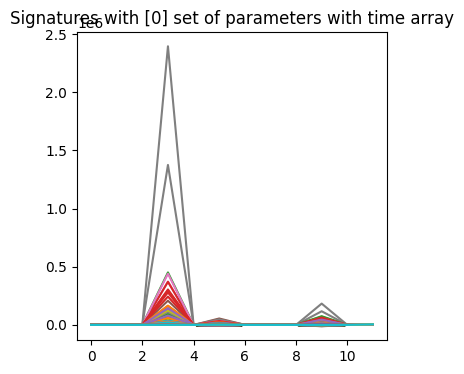

In [54]:
plt.figure(figsize=(4, 4))
plt.plot(signatures_results_thetas[0].T)  #there are 512 sets of parameters
plt.title("Signatures with [0] set of parameters with time array")
plt.show()

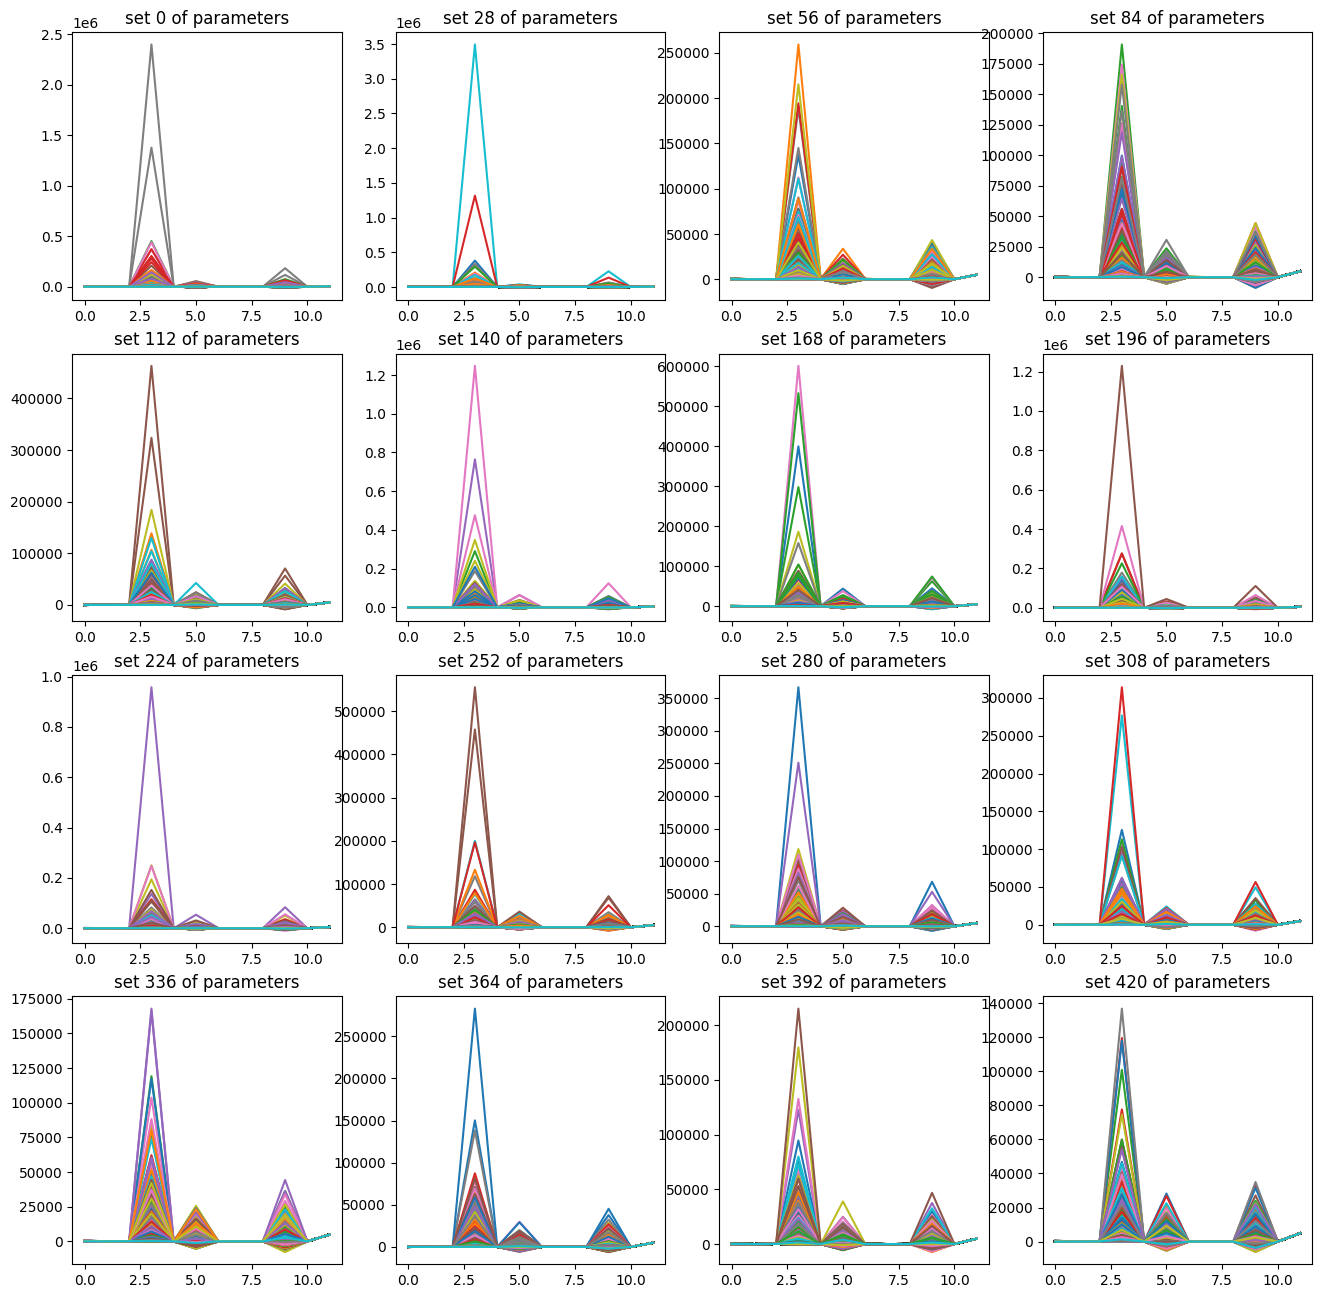

In [55]:
fig, axs = plt.subplots(4, 4, figsize=(4*4, 4*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text("set " + str(i*28)+" of parameters")
    ax.plot(signatures_results_thetas[i*28].T)
#     Plot 10000 signatures for each set of parameters
#     There are big changes on each plot, which are formed on the signature keys (1,1), (1,3), (3,1)

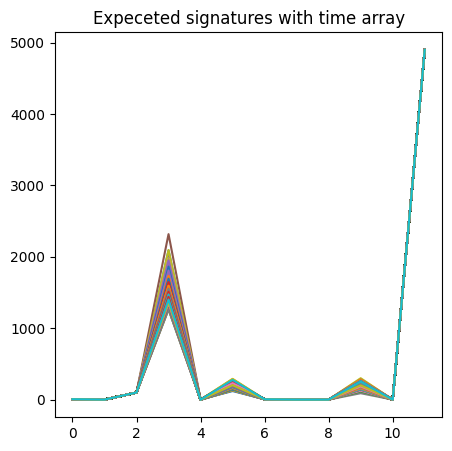

In [56]:
plt.figure(figsize=(5, 5))
plt.plot(Exp_signatures_results_thetas.T[:])
plt.title("Expeceted signatures with time array")
plt.show()
# Plot 512 expected signatures

In [57]:
Exp_signatures_results_thetas.T.shape

torch.Size([12, 450])

In [58]:
torch.mean(Exp_signatures_results_thetas.T[1])

tensor(0.0001)

In [ ]:
# list(range(len(kappas)))
by_parameter["by_kappas"]

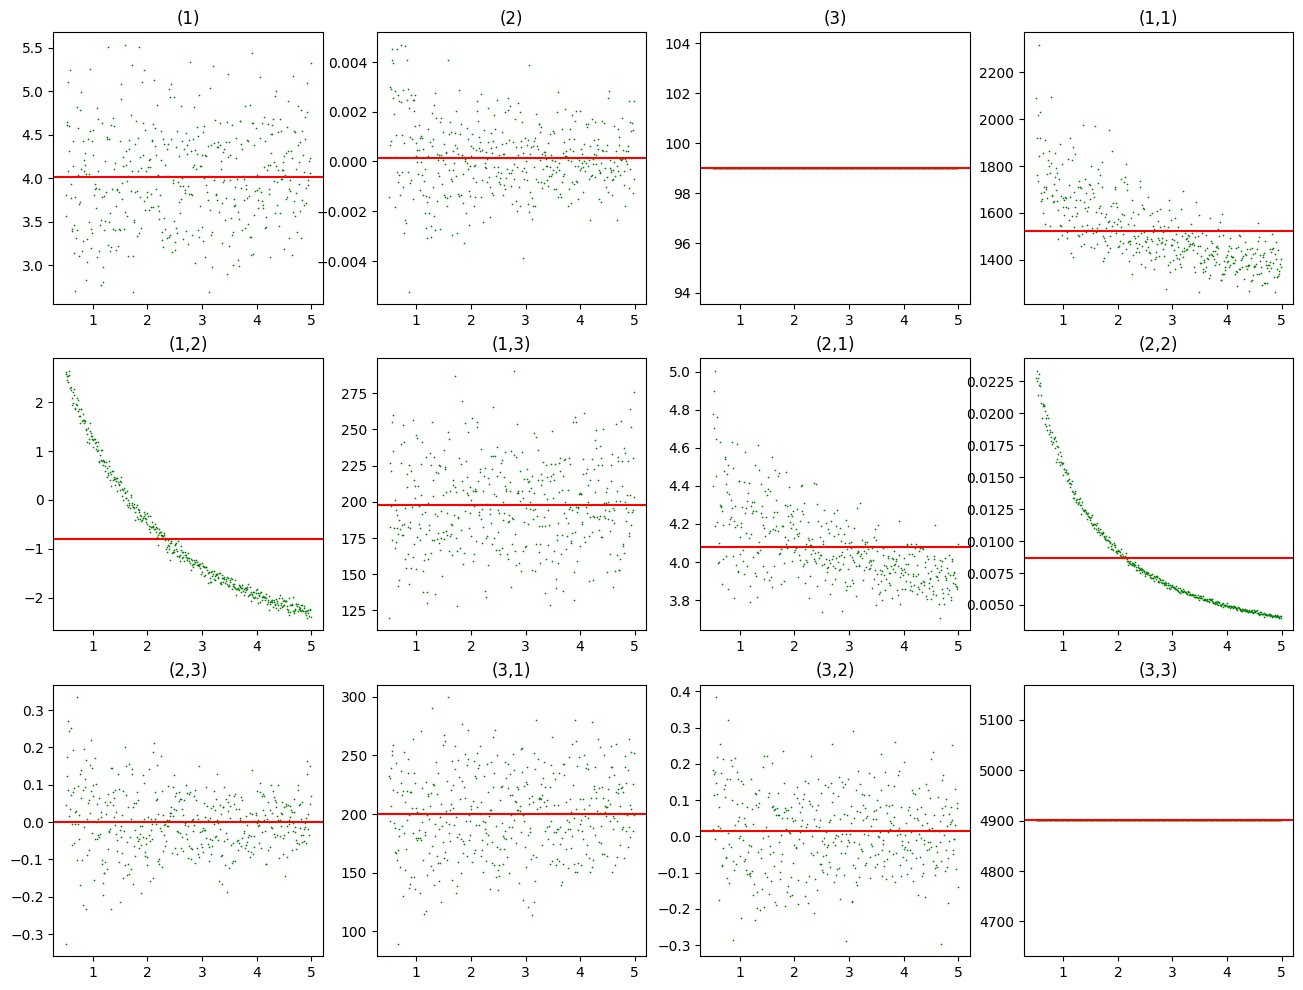

In [60]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.scatter(by_parameter["by_kappas"],Exp_signatures_results_thetas.T[i], color='green', linewidth=0.15, s=1, alpha=1)
    ax.axhline(torch.mean(Exp_signatures_results_thetas.T[i]), color='red')

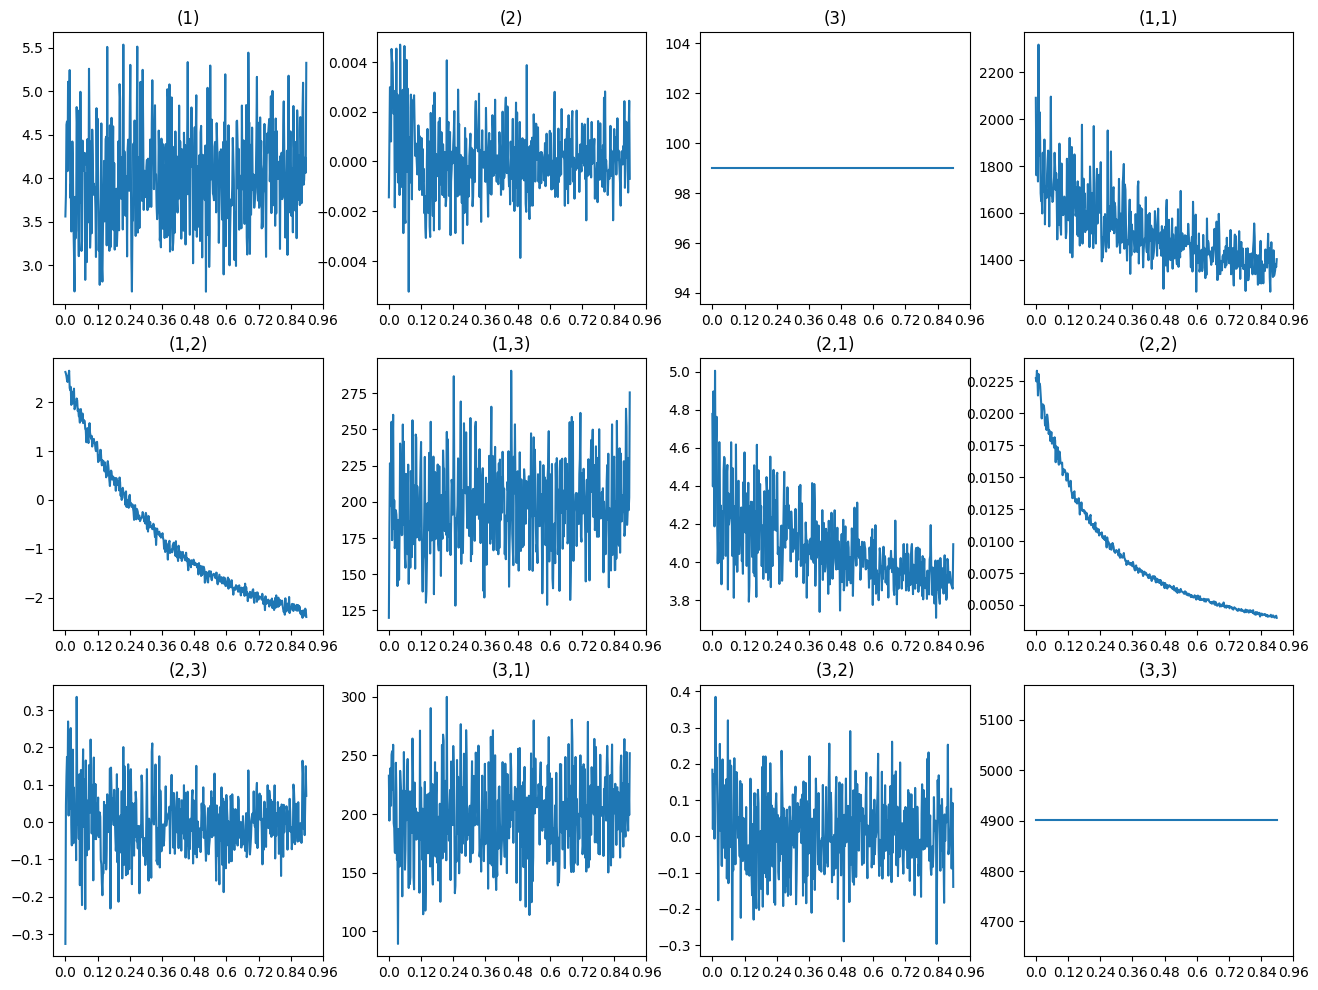

In [61]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.plot(Exp_signatures_results_thetas.T[i])
    ax.set_xticks([0,60,120, 180,240,300,360,420,480],[round(x,3) for x in list(by_parameter["by_sigmas"][[0,60,120, 180,240,300,360,420,480]])])


#     For each key of the signature, plot the evolving Expected Signature depending on the sigmas's values
#     We can note, that most of the keys of the expected signature depend on theta's value. Namely, the bigger theta we have the higher value of the       key, especially for keys that depend on theta we can highlight ( (1,1), (2,1), (2,2)). However, the key (1,2) has the complete opposite          trend, i.e. as the value of theta increases, so does the value of Key (1,2).

#     For time keys like (3) and (3,3) we have constant, since it does not change from the parameters
#     However, for the keys (1), (2), (1,3), (2,3), (3,2) and (3,1) we cannot say a lot in particular, besides that they have a big volatility and that volatility grows as theta grows.

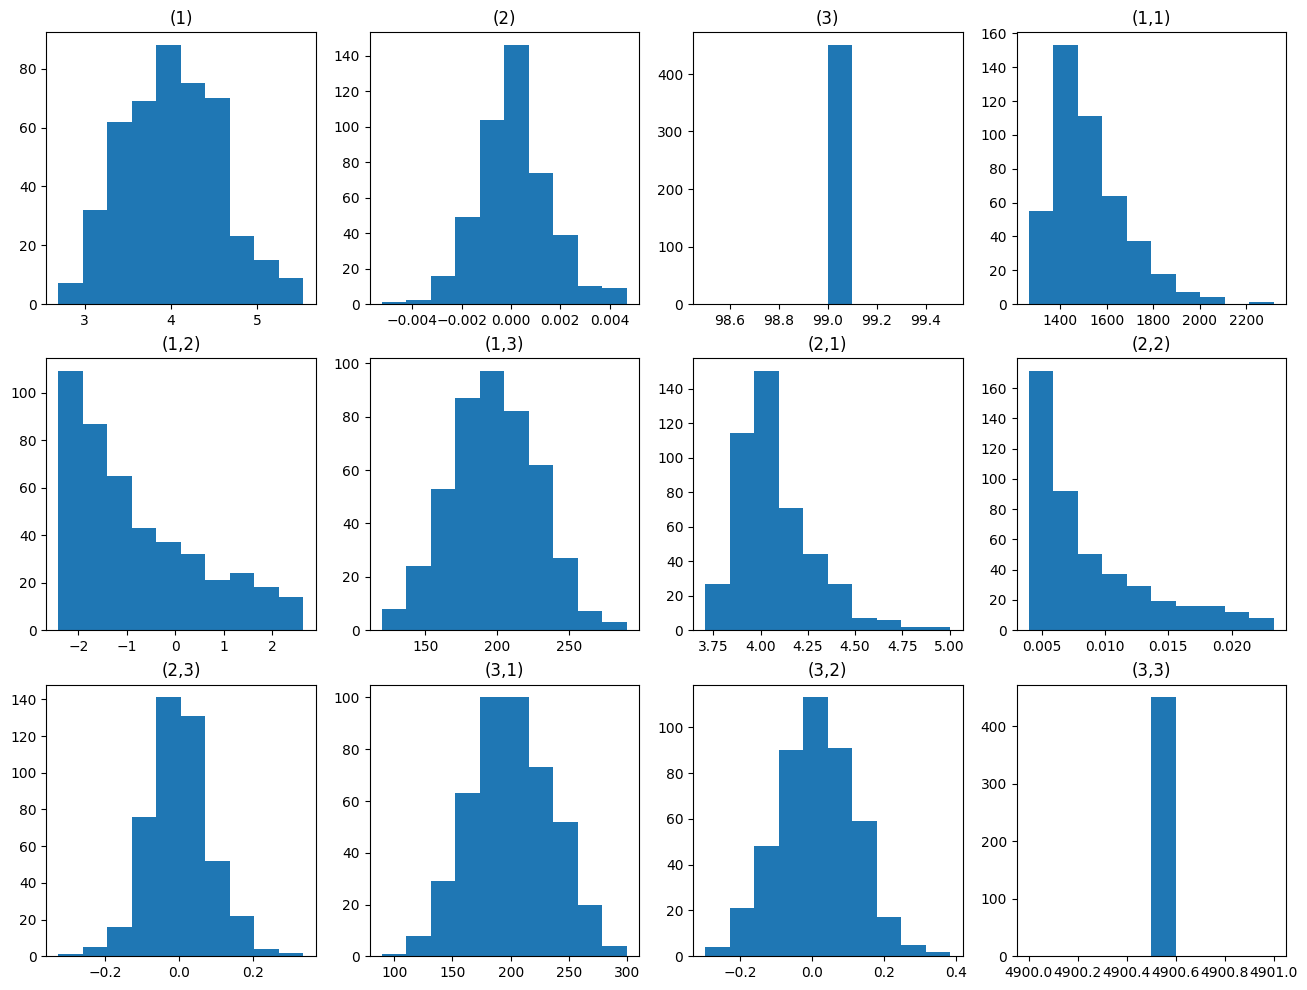

In [62]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.hist(Exp_signatures_results_thetas.T[i])

# Although, if you change the order of parameters in the function "signatures_calculations_with_timearray",
# the graphs of each Expected signature key are different, their histograms are similar.

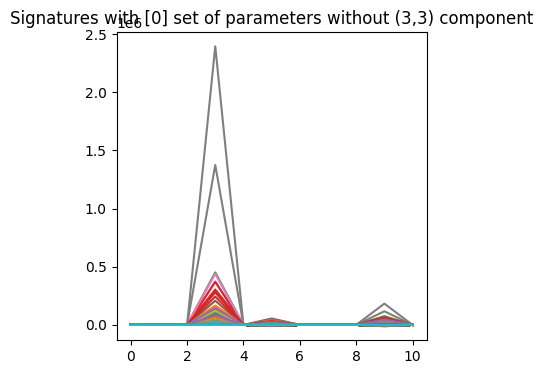

In [63]:
plt.figure(figsize=(4, 4))
plt.plot(signatures_results_thetas[0].T[:-1])  #there are 512 sets of parameters #excluded the last component to better understand the graph, since its value is too big
plt.title("Signatures with [0] set of parameters without (3,3) component")
plt.show()

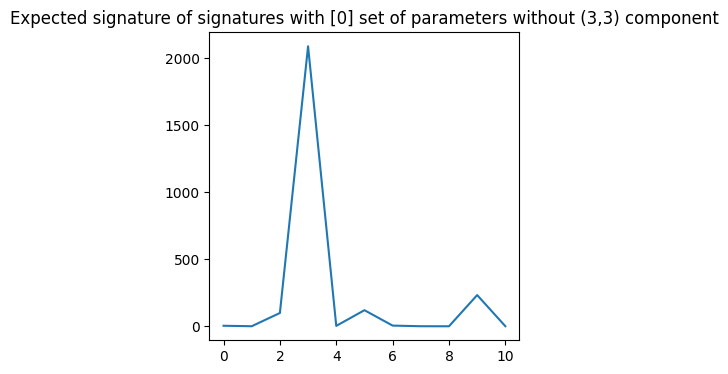

In [64]:
plt.figure(figsize=(4, 4))
plt.plot(Exp_signatures_results_thetas[0].T[:-1])  #there are 512 sets of parameters #exclude last component, since its value is too big
plt.title("Expected signature of signatures with [0] set of parameters without (3,3) component")
plt.show()

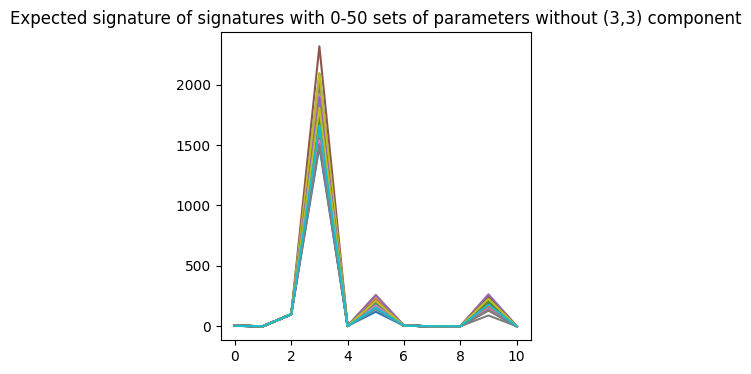

In [65]:
plt.figure(figsize=(4, 4))
plt.plot(Exp_signatures_results_thetas[:50].T[:-1])  #there are 512 sets of parameters #exclude last component, since its value is too big
plt.title("Expected signature of signatures with 0-50 sets of parameters without (3,3) component")
plt.show()

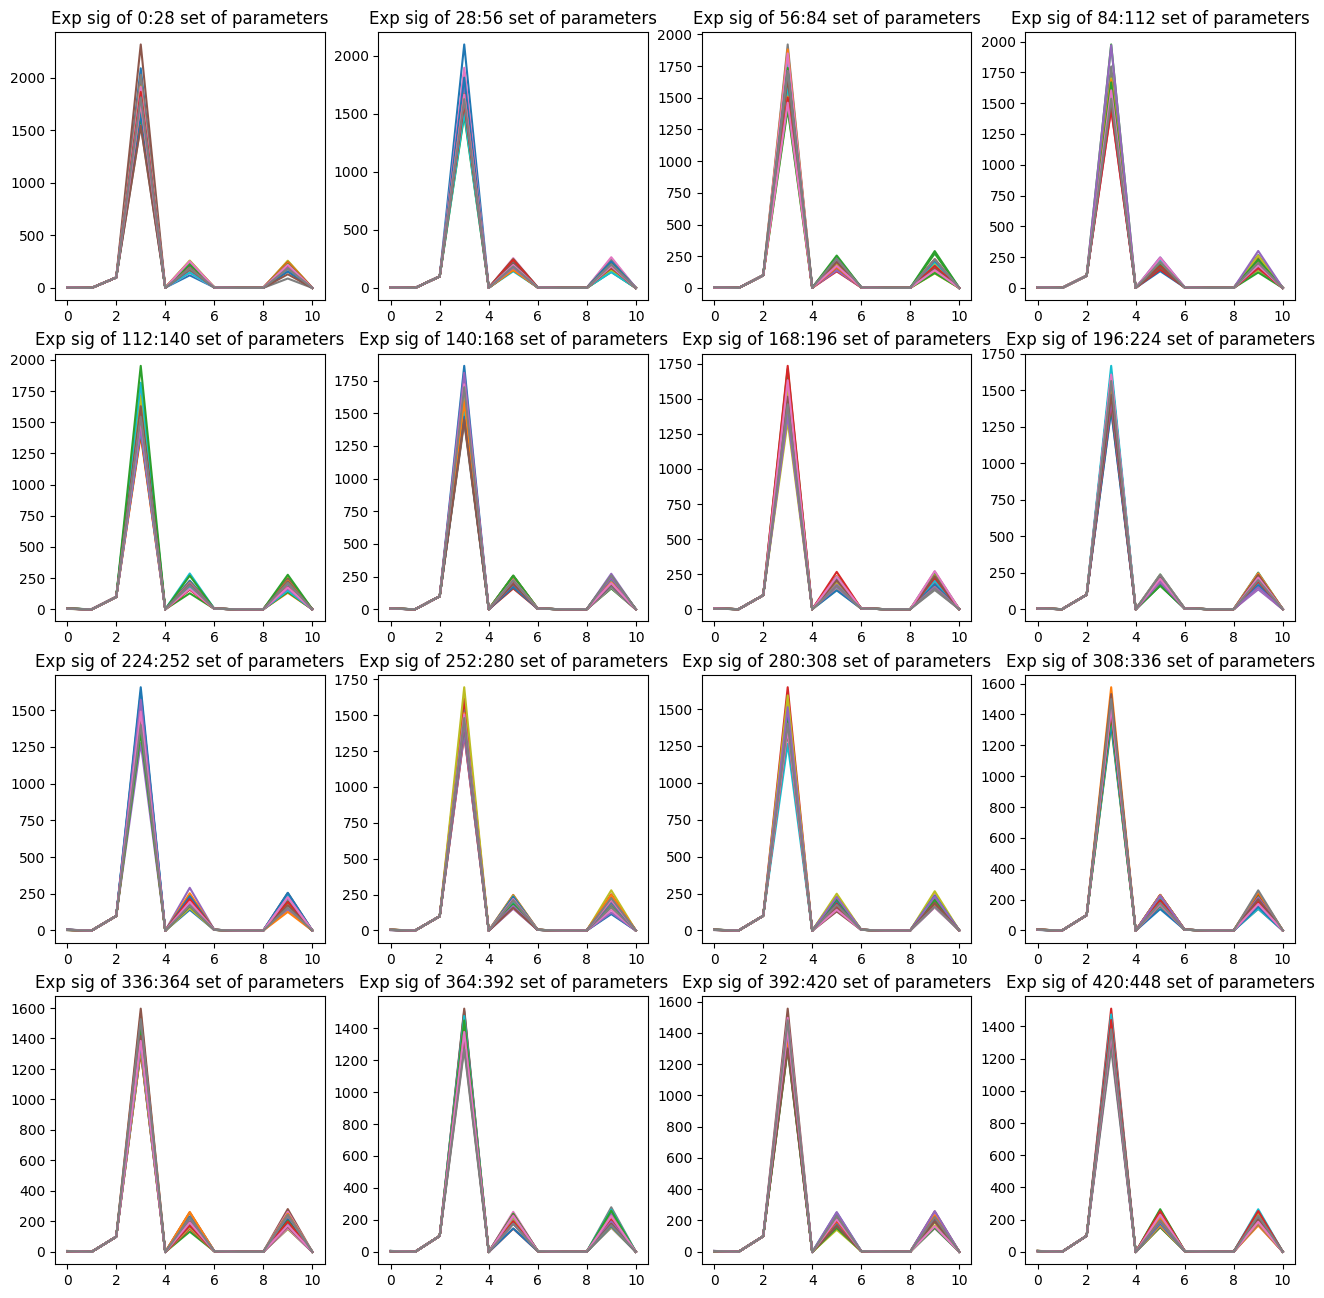

In [66]:
fig, axs = plt.subplots(4, 4, figsize=(4*4, 4*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text("Exp sig of "  + str(i*28)+":"+ str((i+1)*28)+" set of parameters")
    ax.plot(Exp_signatures_results_thetas[i*28:(i+1)*28].T[:-1]) #for better illustration exclude last component, since its value is too big

In [17]:
def signatures_calculations_with_timearray(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths):
    count=0
    for kappa in by_parameter_2["by_kappas"]:
              for theta in by_parameter_2["by_thetas"]:
                        # Caclulation of 10000 paths of prices and sigmas
                        prices_1, sigs_1 = generate_heston_paths(S, T, r, kappa, theta, theta, rho, sigma, steps, paths,
                                                                 return_vol=True)
                        for j in range(paths):
                            prices_and_sigs_with_time_tensor[j] = torch.tensor([prices_1[j], sigs_1[j], time_array]).T
                        #     shape of prices_and_sigs_witout_time_tensor=torch.Size([10000, 100, 3])

                        sign_ps_signatory_differentranges[count] = signatory.signature(prices_and_sigs_with_time_tensor, depth_of_sig)
                        #     shape of  sign_ps_signatory_differentranges=torch.Size([512, 10000, 12])

                        Exp_sign_signatory_results[count] = torch.mean(sign_ps_signatory_differentranges[count], axis=0)
                        #     shape of  Exp_sign_signatory_results=torch.Size([512, 12])

                        count = count + 1
    return sign_ps_signatory_differentranges,Exp_sign_signatory_results

In [18]:
by_parameter_2 = {
    # "by_thetas": np.arange(0.01,0.8,0.0015),  # list to store 50 elements for var1
    "by_rs": np.arange(0.01,0.15,0.0028),  # list to store 50 elements for var2
    "by_rhos": np.arange(0.0,1.1,0.02),  # list to store 55 elements for var3
    "by_sigmas": np.arange(0.0,1.1,0.02),  # list to store 55 elements for var4
    "by_kappas": np.arange(.5,5.0,0.1),   # list to store 45 elements for var5
    "by_thetas": np.arange(0.01,0.8,0.015)  # list to store 45 elements for var1
}

In [19]:
number_of_loops=by_parameter_2["by_kappas"].shape[0]*by_parameter_2["by_thetas"].shape[0]
sign_ps_signatory_differentranges=torch.zeros((number_of_loops,paths,sig_dim))
Exp_sign_signatory_results=torch.zeros((number_of_loops,sig_dim))
sign_ps_signatory_differentranges[0].shape

torch.Size([10000, 12])

In [20]:
results_kappas_and_thetas=signatures_calculations_with_timearray(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths)
signatures_results_kappas_and_thetas=results_kappas_and_thetas[0]
Exp_signatures_results_kappas_and_theta=results_kappas_and_thetas[1]

In [80]:
signatures_results_kappas_and_thetas.shape

torch.Size([2385, 10000, 12])

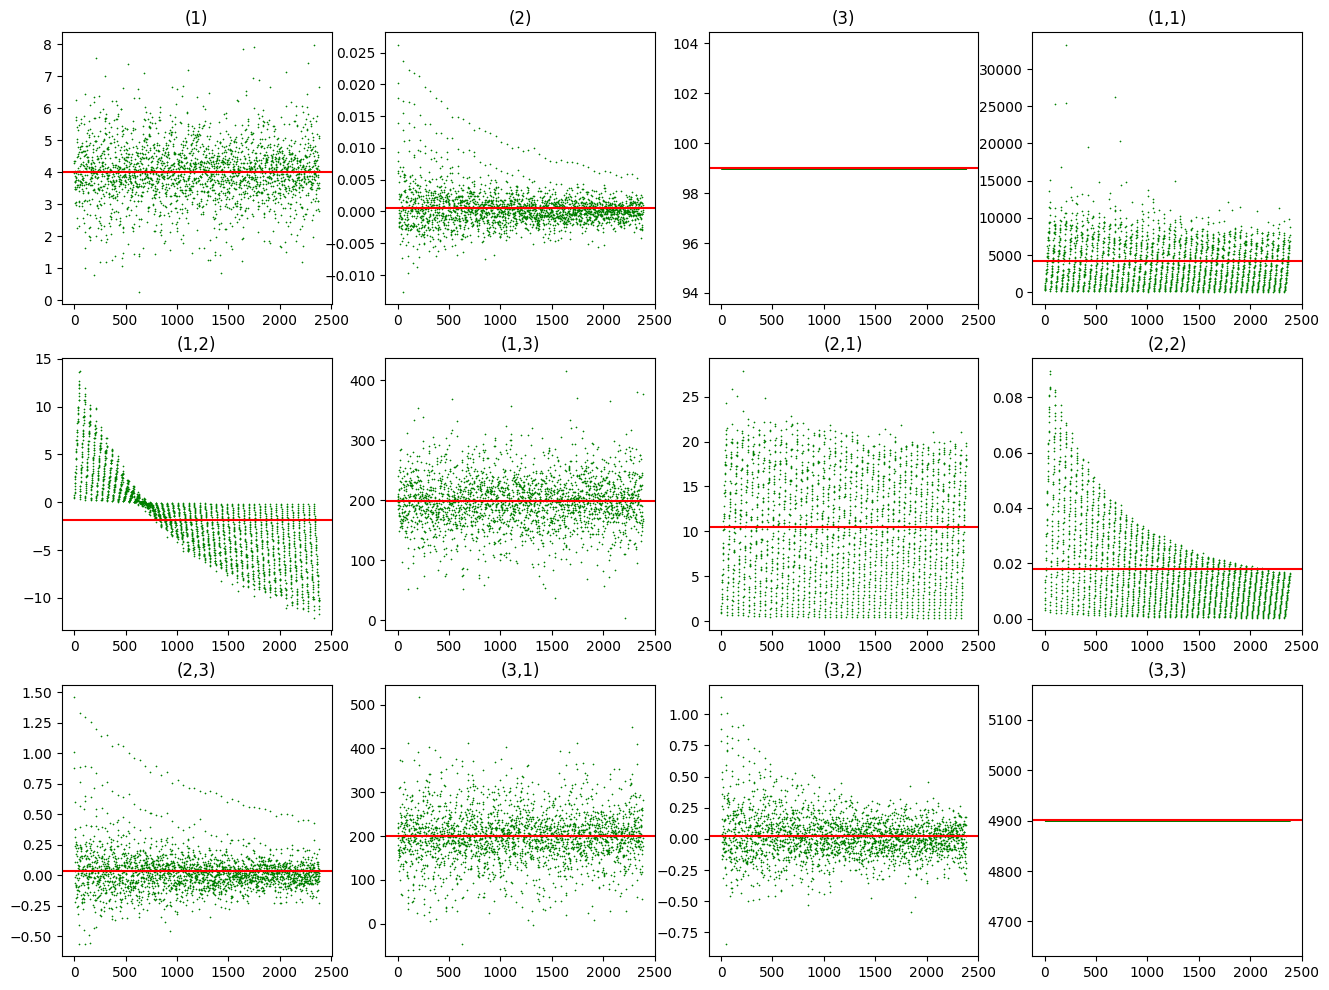

In [85]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.scatter(range(1,2386),Exp_signatures_results_kappas_and_theta.T[i], color='green', linewidth=0.15, s=1, alpha=1)
    ax.axhline(torch.mean(Exp_signatures_results_kappas_and_theta.T[i]), color='red')


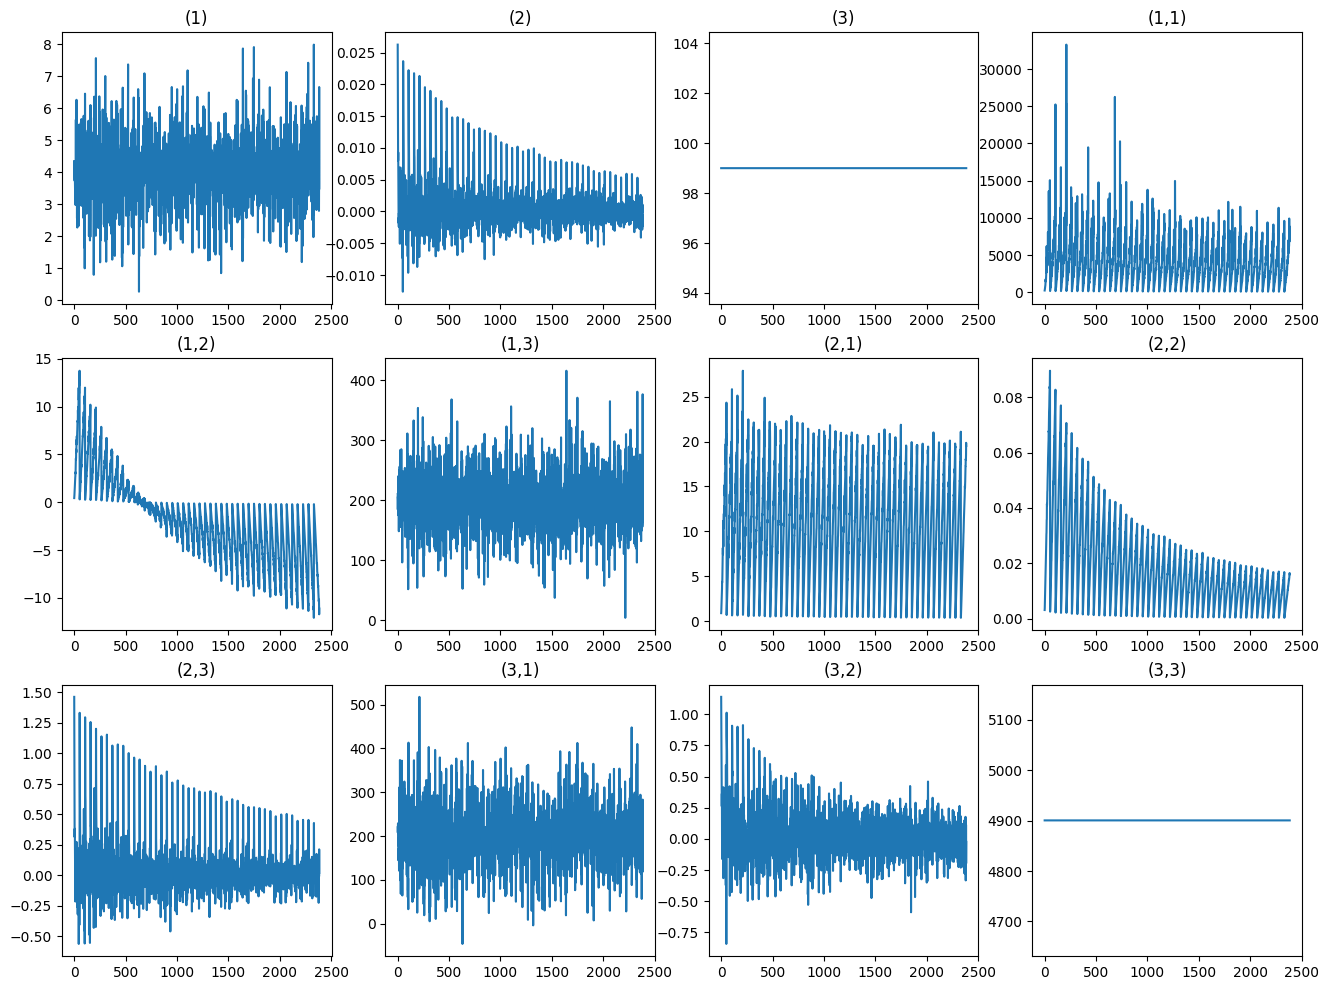

In [83]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.plot(Exp_signatures_results_kappas_and_theta.T[i])

In [87]:
def signatures_calculations_with_timearray(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths):
    count=0
    for kappa in by_parameter_2["by_thetas"]:
              for theta in by_parameter_2["by_kappas"]:
                        # Caclulation of 10000 paths of prices and sigmas
                        prices_1, sigs_1 = generate_heston_paths(S, T, r, kappa, theta, theta, rho, sigma, steps, paths,
                                                                 return_vol=True)
                        for j in range(paths):
                            prices_and_sigs_with_time_tensor[j] = torch.tensor([prices_1[j], sigs_1[j], time_array]).T
                        #     shape of prices_and_sigs_witout_time_tensor=torch.Size([10000, 100, 3])

                        sign_ps_signatory_differentranges[count] = signatory.signature(prices_and_sigs_with_time_tensor, depth_of_sig)
                        #     shape of  sign_ps_signatory_differentranges=torch.Size([512, 10000, 12])

                        Exp_sign_signatory_results[count] = torch.mean(sign_ps_signatory_differentranges[count], axis=0)
                        #     shape of  Exp_sign_signatory_results=torch.Size([512, 12])

                        count = count + 1
    return sign_ps_signatory_differentranges,Exp_sign_signatory_results

In [86]:
number_of_loops=by_parameter_2["by_kappas"].shape[0]*by_parameter_2["by_thetas"].shape[0]
sign_ps_signatory_differentranges=torch.zeros((number_of_loops,paths,sig_dim))
Exp_sign_signatory_results=torch.zeros((number_of_loops,sig_dim))
sign_ps_signatory_differentranges[0].shape

torch.Size([10000, 12])

In [88]:
results_thetas_and_kappas=signatures_calculations_with_timearray(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths)
signatures_result_thetas_and_kappas=results_thetas_and_kappas[0]
Exp_signatures_results_thetas_and_kappas=results_thetas_and_kappas[1]

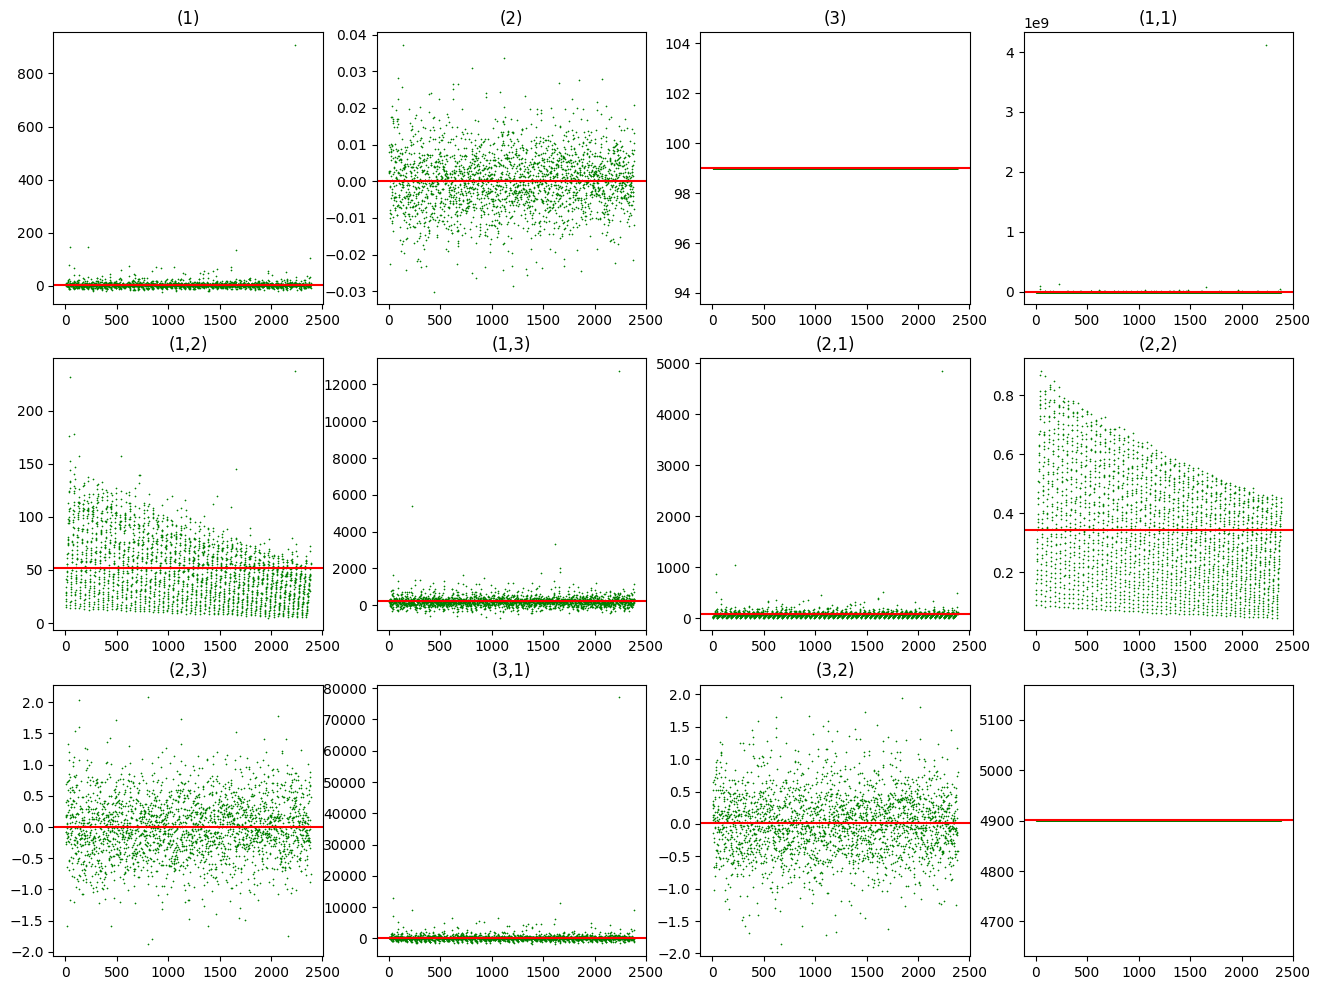

In [91]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.scatter(range(1,2386),Exp_signatures_results_thetas_and_kappas.T[i], color='green', linewidth=0.15, s=1, alpha=1)
    ax.axhline(torch.mean(Exp_signatures_results_thetas_and_kappas.T[i]), color='red')

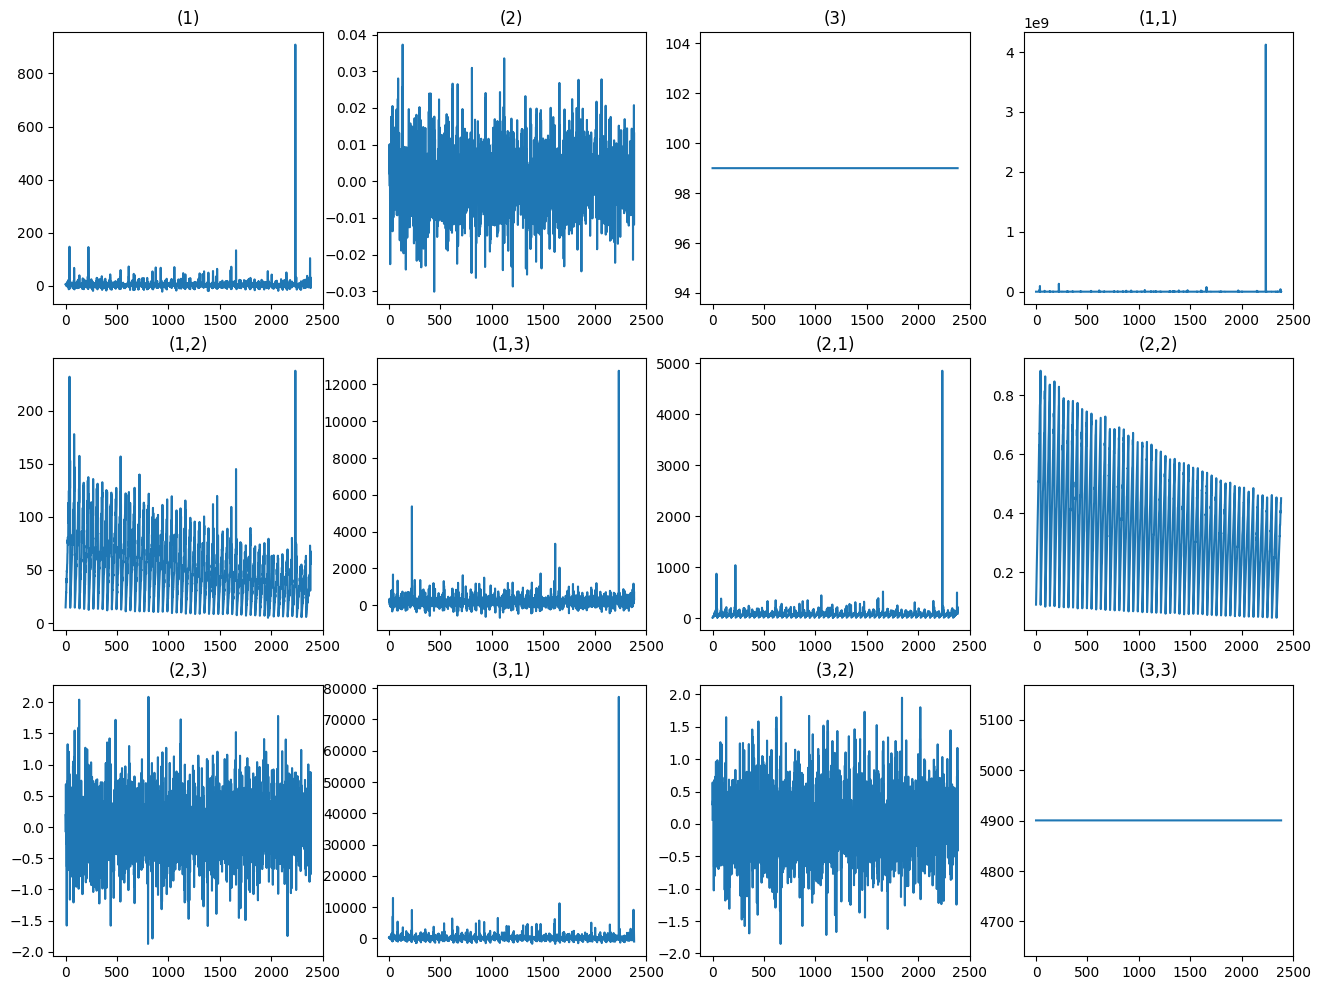

In [92]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.plot(Exp_signatures_results_thetas_and_kappas.T[i])

In [93]:
def signatures_calculations_with_timearray(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths):
    count=0
    for kappa in by_parameter_2["by_thetas"]:
              for theta in by_parameter_2["by_sigmas"]:
                        # Caclulation of 10000 paths of prices and sigmas
                        prices_1, sigs_1 = generate_heston_paths(S, T, r, kappa, theta, theta, rho, sigma, steps, paths,
                                                                 return_vol=True)
                        for j in range(paths):
                            prices_and_sigs_with_time_tensor[j] = torch.tensor([prices_1[j], sigs_1[j], time_array]).T
                        #     shape of prices_and_sigs_witout_time_tensor=torch.Size([10000, 100, 3])

                        sign_ps_signatory_differentranges[count] = signatory.signature(prices_and_sigs_with_time_tensor, depth_of_sig)
                        #     shape of  sign_ps_signatory_differentranges=torch.Size([512, 10000, 12])

                        Exp_sign_signatory_results[count] = torch.mean(sign_ps_signatory_differentranges[count], axis=0)
                        #     shape of  Exp_sign_signatory_results=torch.Size([512, 12])

                        count = count + 1
    return sign_ps_signatory_differentranges,Exp_sign_signatory_results

In [94]:
number_of_loops=by_parameter_2["by_sigmas"].shape[0]*by_parameter_2["by_thetas"].shape[0]
sign_ps_signatory_differentranges=torch.zeros((number_of_loops,paths,sig_dim))
Exp_sign_signatory_results=torch.zeros((number_of_loops,sig_dim))
sign_ps_signatory_differentranges[0].shape

torch.Size([10000, 12])

In [95]:
results_thetas_and_sigmas=signatures_calculations_with_timearray(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths)
signatures_result_thetas_and_sigmas=results_thetas_and_sigmas[0]
Exp_signatures_results_thetas_and_sigmas=results_thetas_and_sigmas[1]

In [96]:
Exp_signatures_results_thetas_and_sigmas.T[i].shape

torch.Size([2915])

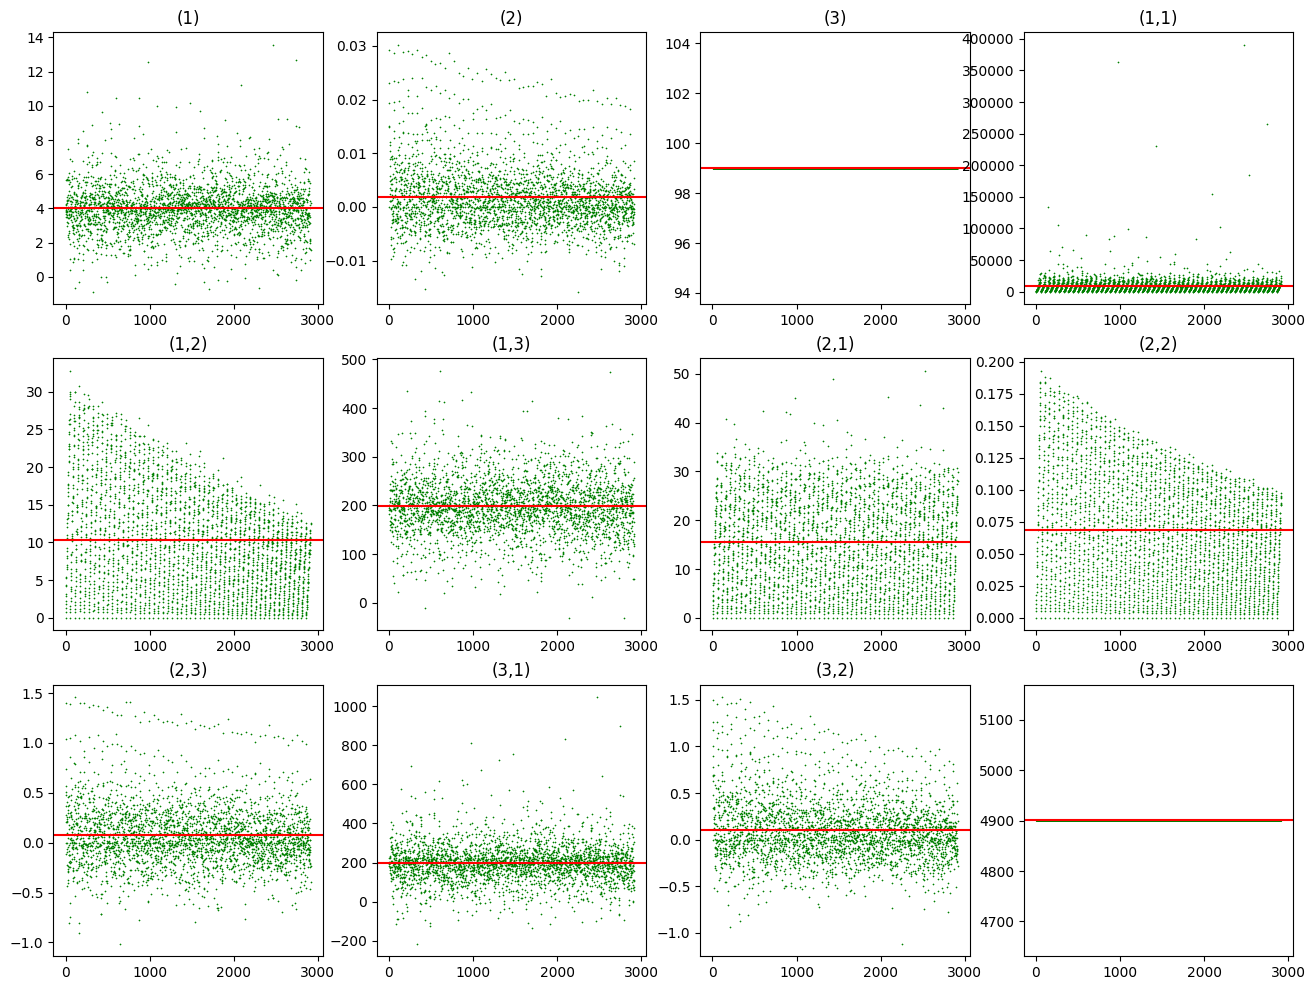

In [97]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.scatter(range(1,2916),Exp_signatures_results_thetas_and_sigmas.T[i], color='green', linewidth=0.15, s=1, alpha=1)
    ax.axhline(torch.mean(Exp_signatures_results_thetas_and_sigmas.T[i]), color='red')

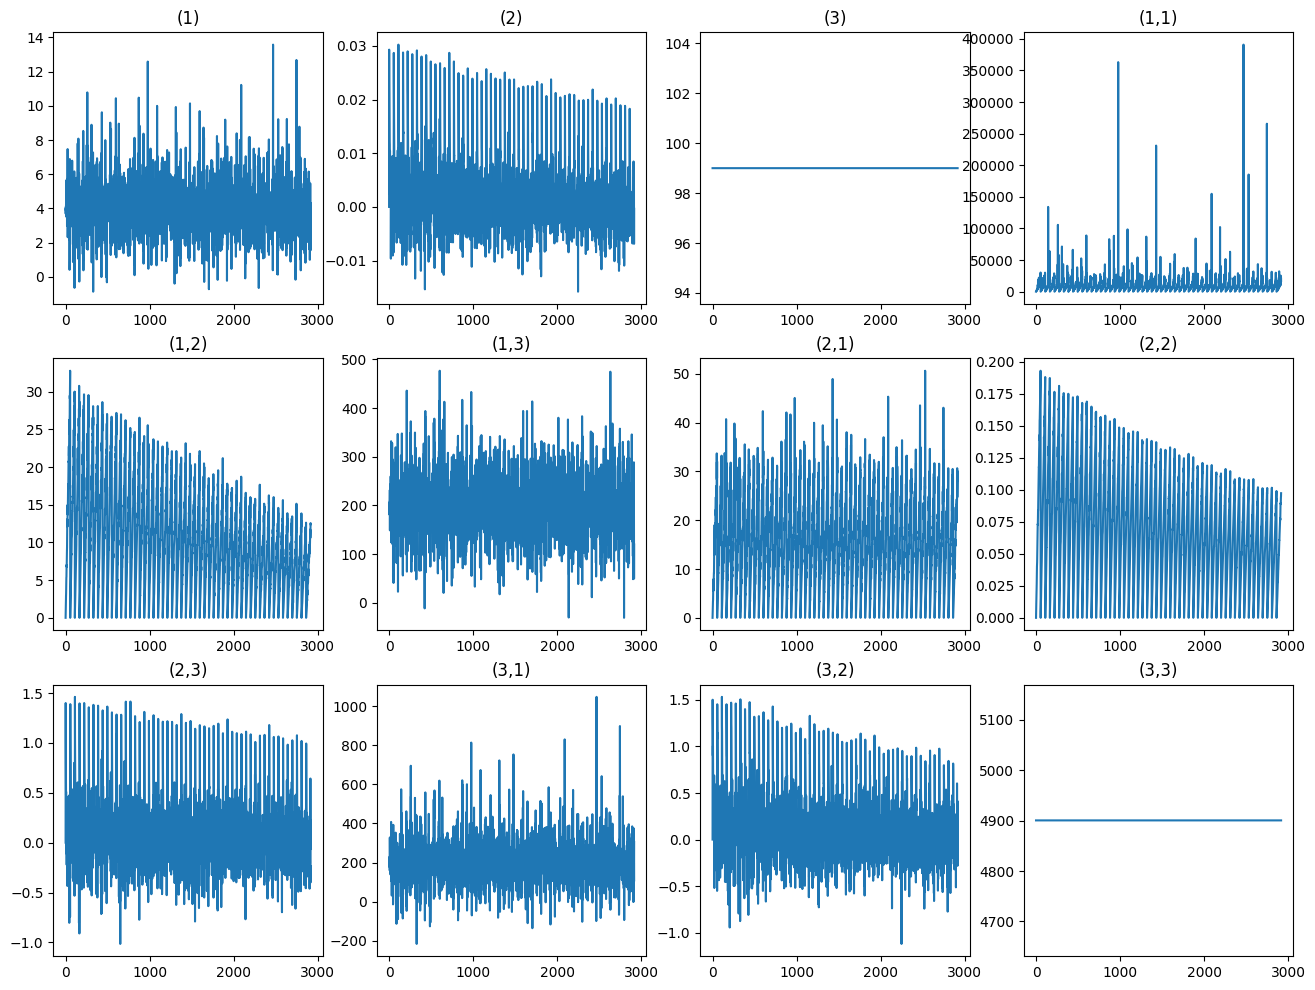

In [98]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.plot(Exp_signatures_results_thetas_and_sigmas.T[i])

In [99]:
def signatures_calculations_with_timearray(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths):
    count=0
    for kappa in by_parameter_2["by_sigmas"]:
              for theta in by_parameter_2["by_thetas"]:
                        # Caclulation of 10000 paths of prices and sigmas
                        prices_1, sigs_1 = generate_heston_paths(S, T, r, kappa, theta, theta, rho, sigma, steps, paths,
                                                                 return_vol=True)
                        for j in range(paths):
                            prices_and_sigs_with_time_tensor[j] = torch.tensor([prices_1[j], sigs_1[j], time_array]).T
                        #     shape of prices_and_sigs_witout_time_tensor=torch.Size([10000, 100, 3])

                        sign_ps_signatory_differentranges[count] = signatory.signature(prices_and_sigs_with_time_tensor, depth_of_sig)
                        #     shape of  sign_ps_signatory_differentranges=torch.Size([512, 10000, 12])

                        Exp_sign_signatory_results[count] = torch.mean(sign_ps_signatory_differentranges[count], axis=0)
                        #     shape of  Exp_sign_signatory_results=torch.Size([512, 12])

                        count = count + 1
    return sign_ps_signatory_differentranges,Exp_sign_signatory_results

In [100]:
results_sigmas_and_thetas=signatures_calculations_with_timearray(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths)
signatures_result_sigmas_and_thetas=results_sigmas_and_thetas[0]
Exp_signatures_results_sigmas_and_thetas=results_sigmas_and_thetas[1]

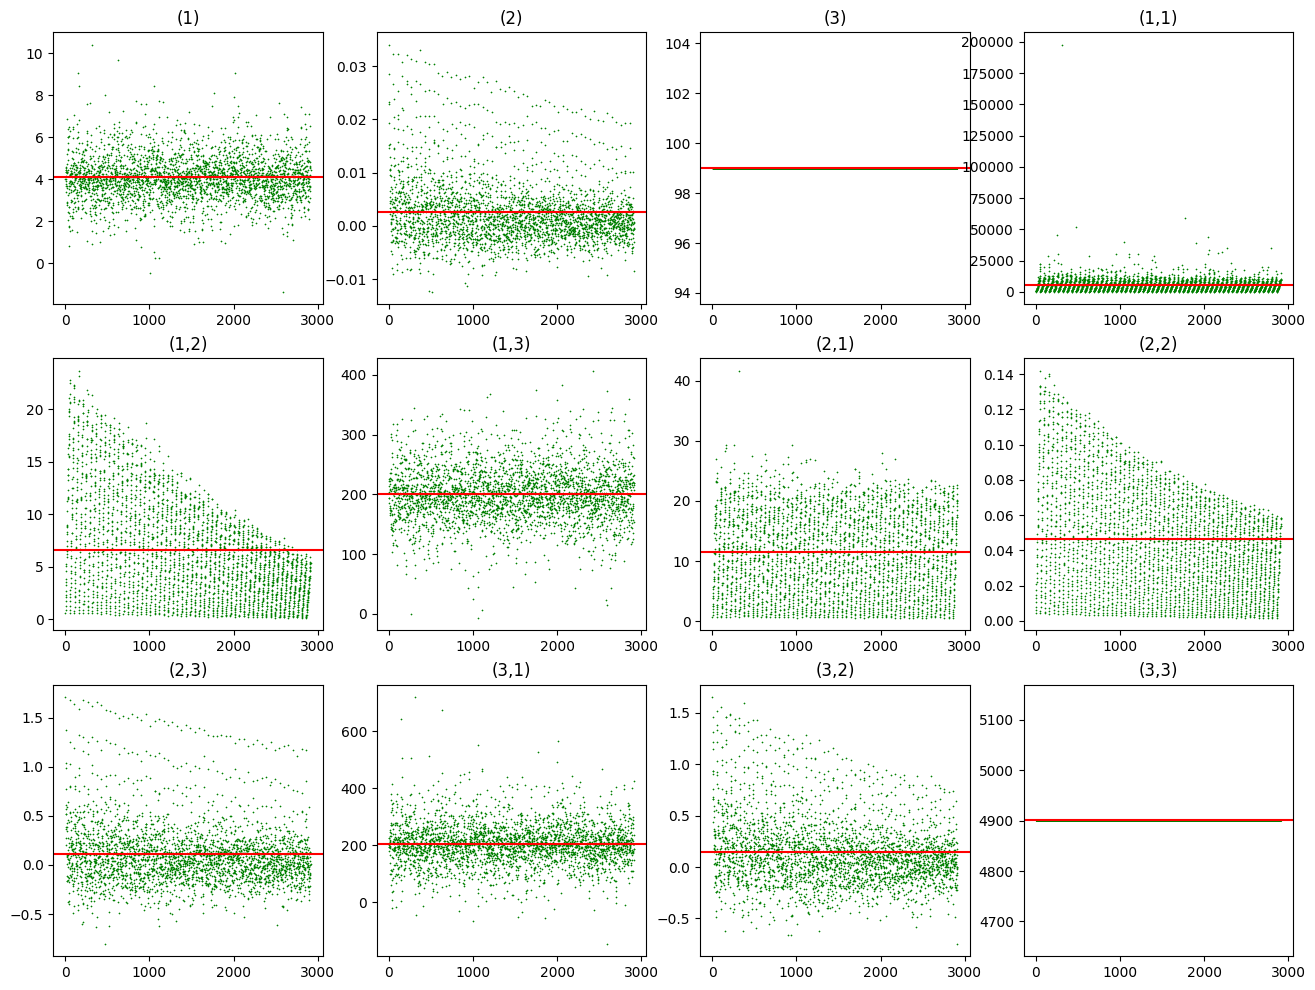

In [101]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.scatter(range(1,2916),Exp_signatures_results_sigmas_and_thetas.T[i], color='green', linewidth=0.15, s=1, alpha=1)
    ax.axhline(torch.mean(Exp_signatures_results_sigmas_and_thetas.T[i]), color='red')

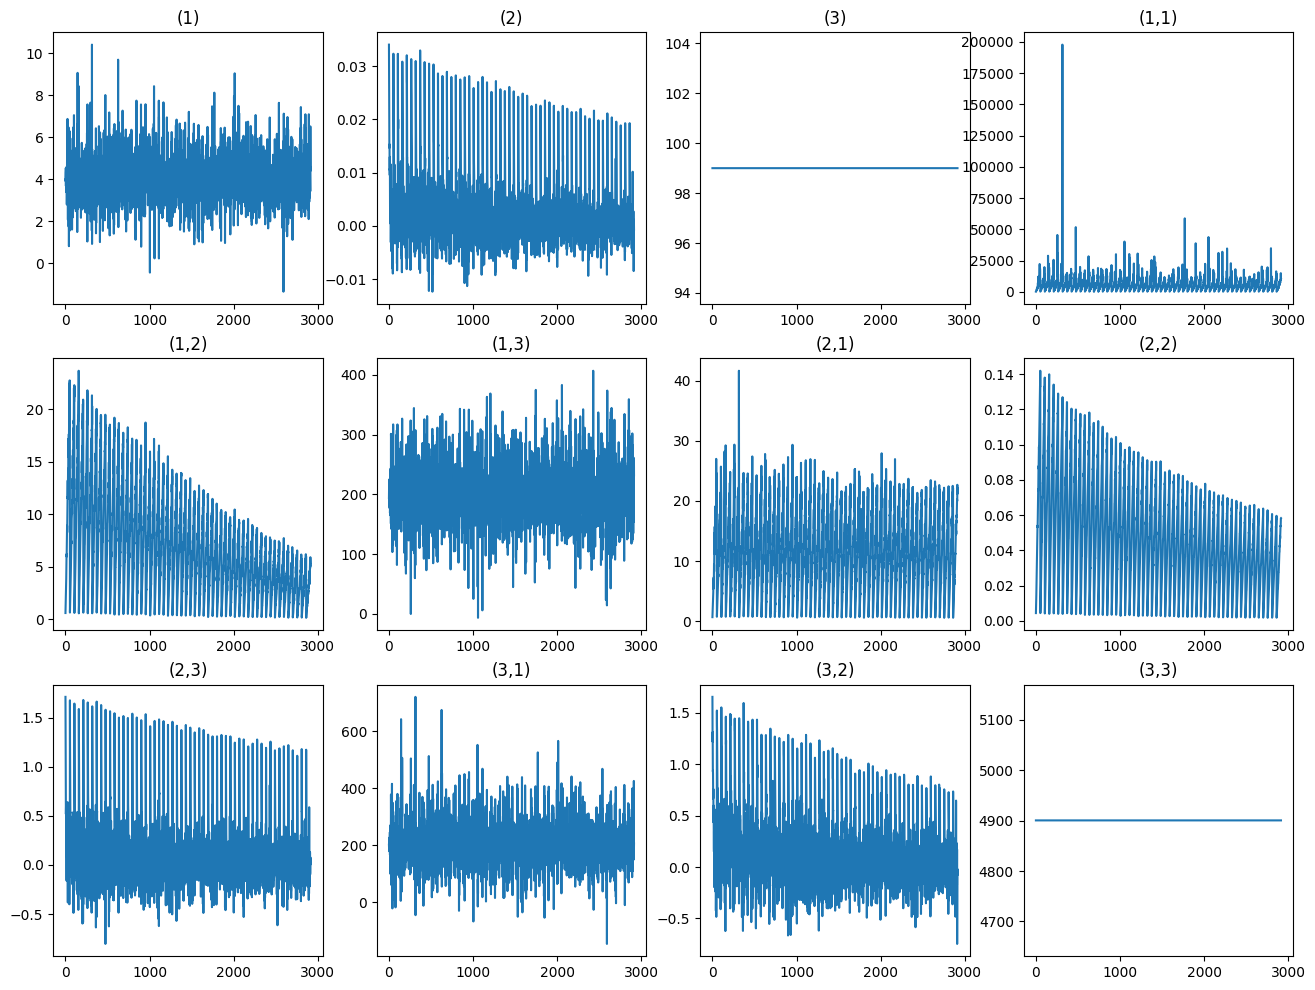

In [102]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.plot(Exp_signatures_results_sigmas_and_thetas.T[i])

In [19]:
number_of_loops=by_parameter_2["by_sigmas"].shape[0]*by_parameter_2["by_kappas"].shape[0]
sign_ps_signatory_differentranges=torch.zeros((number_of_loops,paths,sig_dim))
Exp_sign_signatory_results=torch.zeros((number_of_loops,sig_dim))
sign_ps_signatory_differentranges[0].shape

torch.Size([10000, 12])

In [20]:
def signatures_calculations_with_timearray(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths):
    count=0
    for kappa in by_parameter_2["by_sigmas"]:
              for theta in by_parameter_2["by_kappas"]:
                        # Caclulation of 10000 paths of prices and sigmas
                        prices_1, sigs_1 = generate_heston_paths(S, T, r, kappa, theta, theta, rho, sigma, steps, paths,
                                                                 return_vol=True)
                        for j in range(paths):
                            prices_and_sigs_with_time_tensor[j] = torch.tensor([prices_1[j], sigs_1[j], time_array]).T
                        #     shape of prices_and_sigs_witout_time_tensor=torch.Size([10000, 100, 3])

                        sign_ps_signatory_differentranges[count] = signatory.signature(prices_and_sigs_with_time_tensor, depth_of_sig)
                        #     shape of  sign_ps_signatory_differentranges=torch.Size([512, 10000, 12])

                        Exp_sign_signatory_results[count] = torch.mean(sign_ps_signatory_differentranges[count], axis=0)
                        #     shape of  Exp_sign_signatory_results=torch.Size([512, 12])

                        count = count + 1
    return sign_ps_signatory_differentranges,Exp_sign_signatory_results

In [21]:
results_sigmas_and_kappas=signatures_calculations_with_timearray(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths)
signatures_result_sigmas_and_kappas=results_sigmas_and_kappas[0]
Exp_signatures_results_sigmas_and_kappas=results_sigmas_and_kappas[1]

In [107]:
Exp_signatures_results_sigmas_and_kappas.T[i].shape

torch.Size([2475])

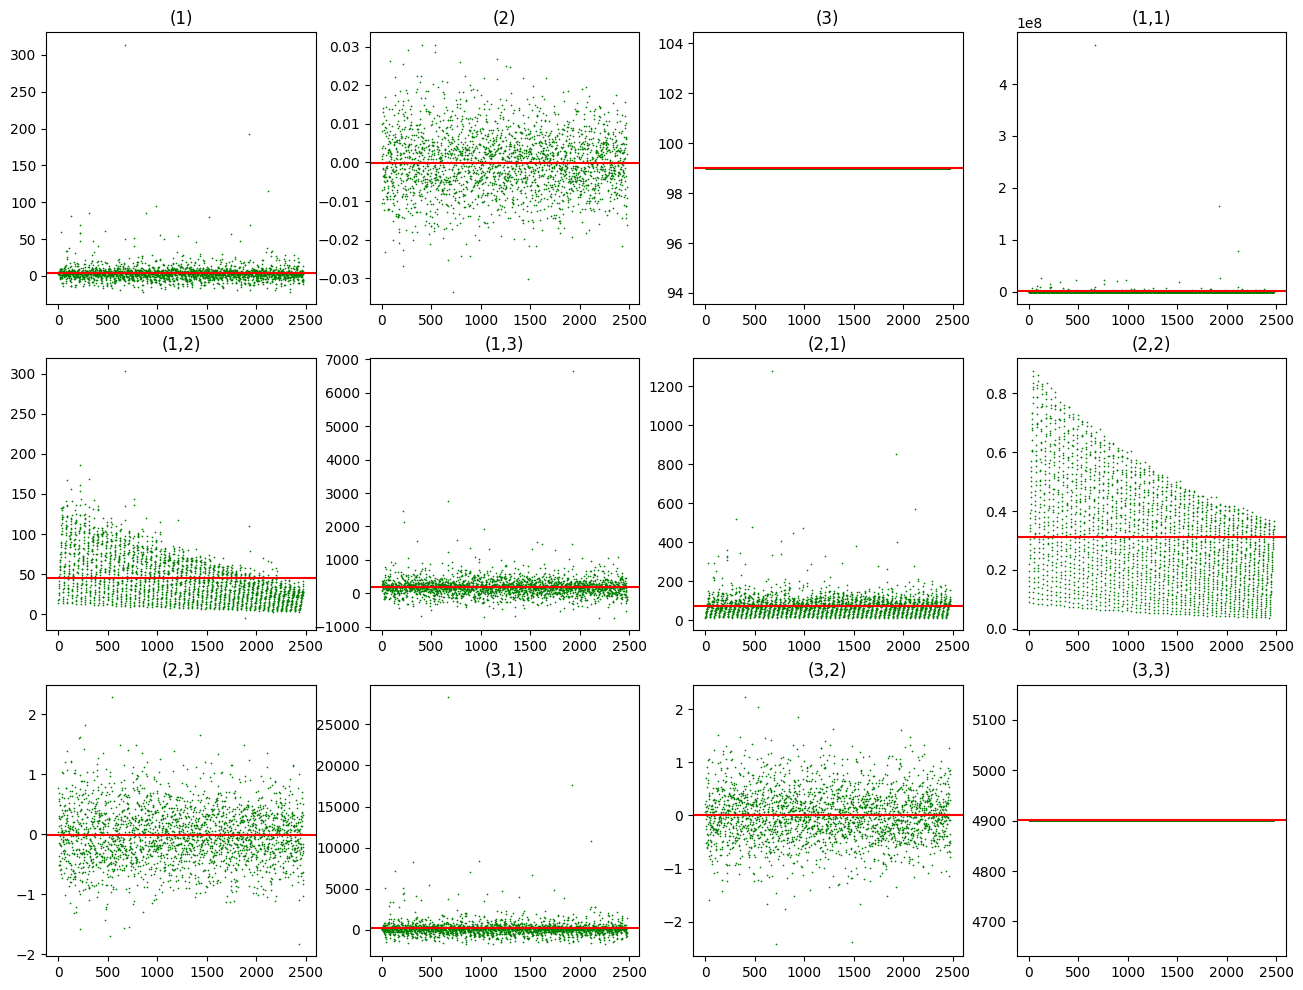

In [108]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.scatter(range(1,2476),Exp_signatures_results_sigmas_and_kappas.T[i], color='green', linewidth=0.15, s=1, alpha=1)
    ax.axhline(torch.mean(Exp_signatures_results_sigmas_and_kappas.T[i]), color='red')

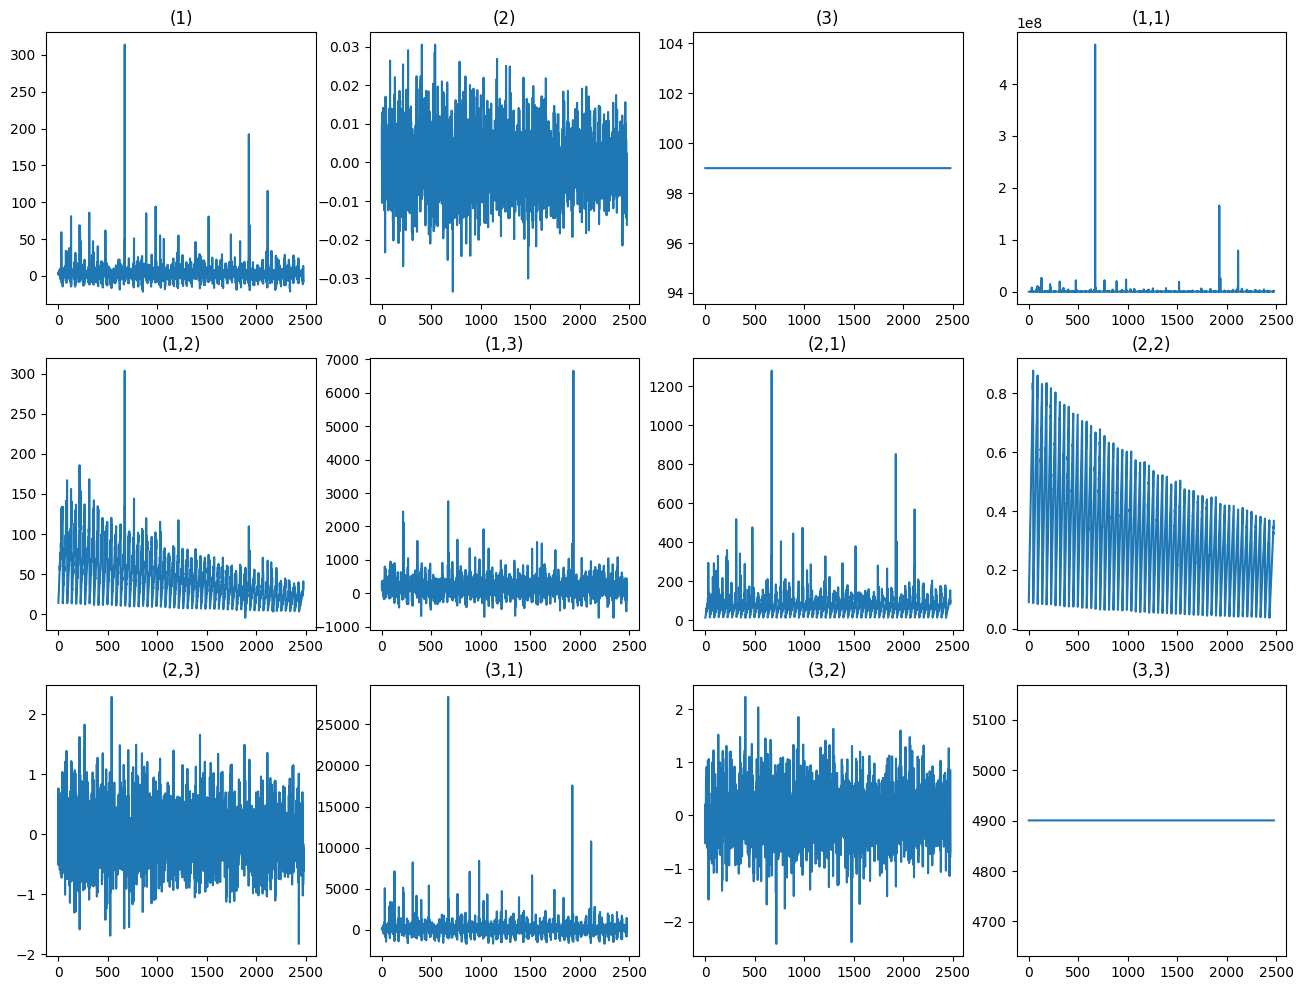

In [109]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.plot(Exp_signatures_results_sigmas_and_kappas.T[i])

In [31]:
def signatures_calculations_with_timearray(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths):
    count=0
    for kappa in by_parameter_2["by_kappas"]:
              for theta in by_parameter_2["by_sigmas"]:
                        # Caclulation of 10000 paths of prices and sigmas
                        prices_1, sigs_1 = generate_heston_paths(S, T, r, kappa, theta, theta, rho, sigma, steps, paths,
                                                                 return_vol=True)
                        for j in range(paths):
                            prices_and_sigs_with_time_tensor[j] = torch.tensor([prices_1[j], sigs_1[j], time_array]).T
                        #     shape of prices_and_sigs_witout_time_tensor=torch.Size([10000, 100, 3])

                        sign_ps_signatory_differentranges[count] = signatory.signature(prices_and_sigs_with_time_tensor, depth_of_sig)
                        #     shape of  sign_ps_signatory_differentranges=torch.Size([512, 10000, 12])

                        Exp_sign_signatory_results[count] = torch.mean(sign_ps_signatory_differentranges[count], axis=0)
                        #     shape of  Exp_sign_signatory_results=torch.Size([512, 12])

                        count = count + 1
    return sign_ps_signatory_differentranges,Exp_sign_signatory_results

In [32]:
results_kappas_and_sigmas=signatures_calculations_with_timearray(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths)
signatures_result_kappas_and_sigmas=results_kappas_and_sigmas[0]
Exp_signatures_results_kappas_and_sigmas=results_kappas_and_sigmas[1]

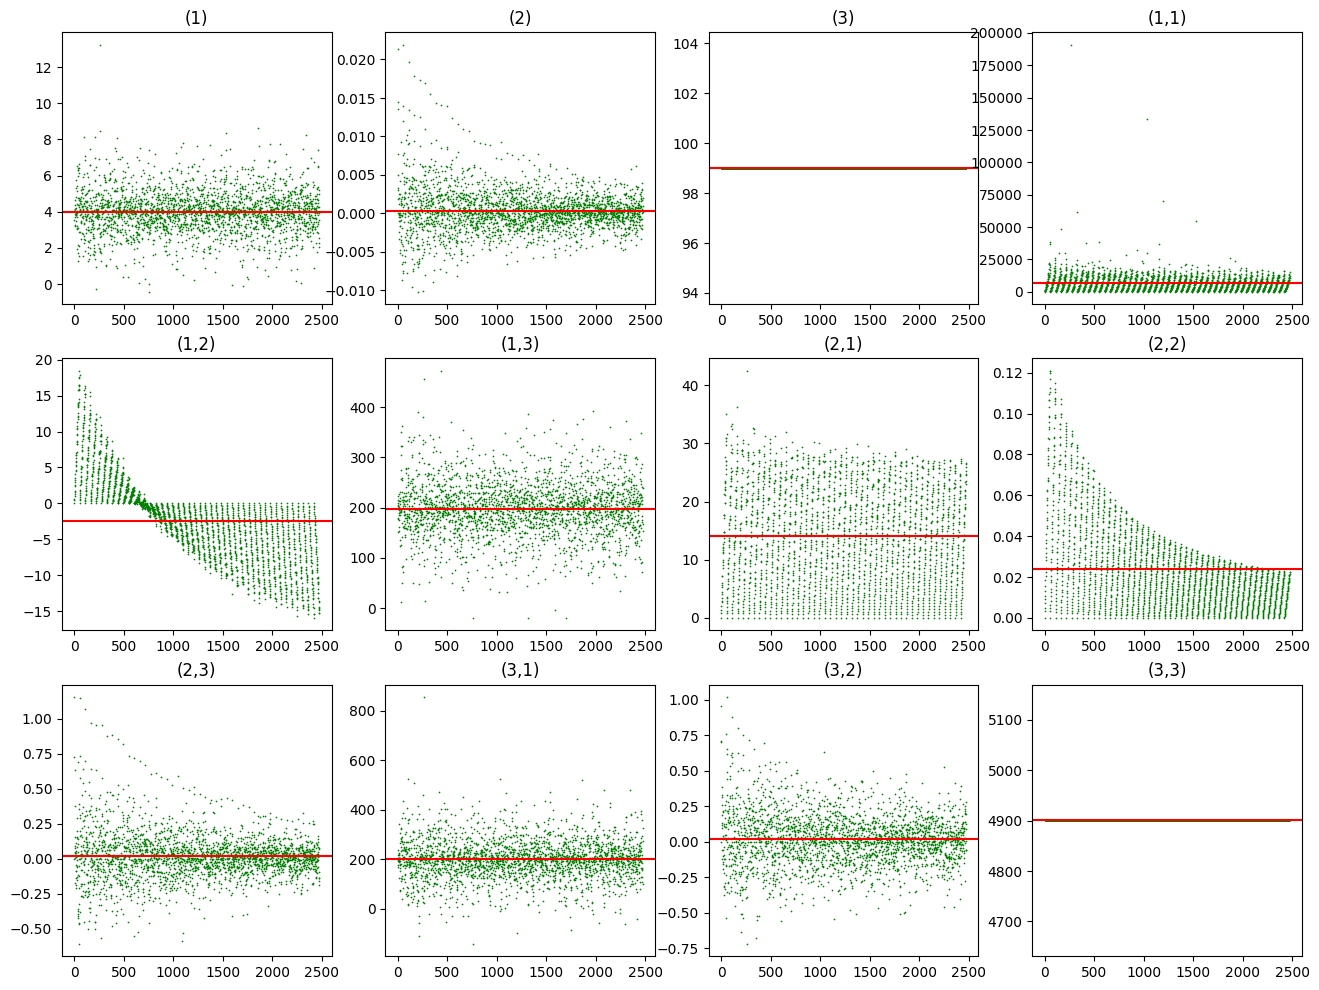

In [33]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.scatter(range(1,2476),Exp_signatures_results_kappas_and_sigmas.T[i], color='green', linewidth=0.15, s=1, alpha=1)
    ax.axhline(torch.mean(Exp_signatures_results_kappas_and_sigmas.T[i]), color='red')

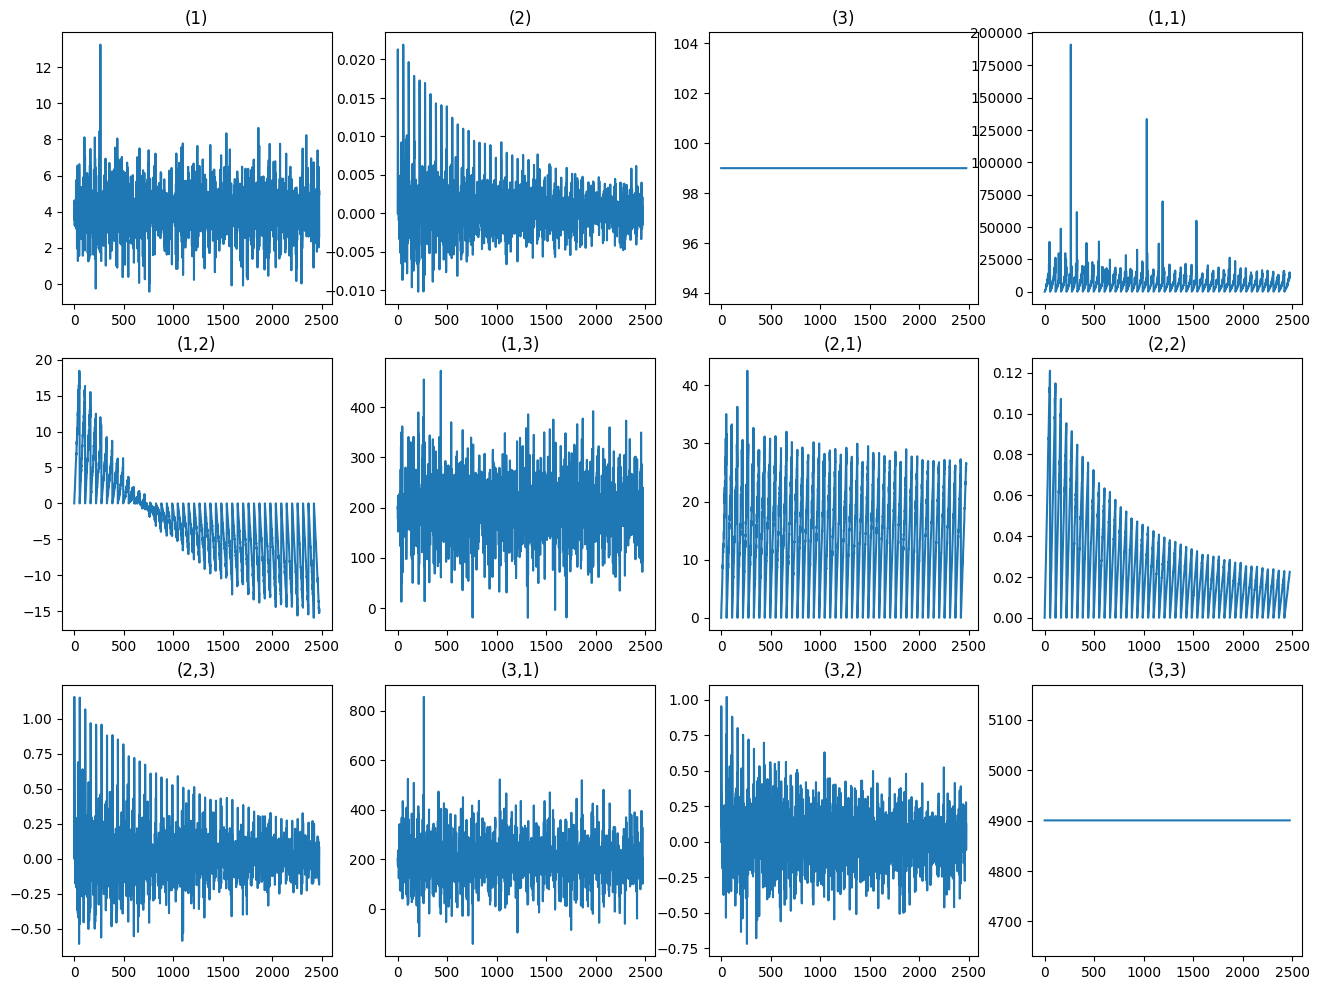

In [34]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.plot(Exp_signatures_results_kappas_and_sigmas.T[i])

In [35]:
number_of_loops=by_parameter_2["by_rhos"].shape[0]*by_parameter_2["by_sigmas"].shape[0]
sign_ps_signatory_differentranges=torch.zeros((number_of_loops,paths,sig_dim))
Exp_sign_signatory_results=torch.zeros((number_of_loops,sig_dim))
sign_ps_signatory_differentranges[0].shape

torch.Size([10000, 12])

In [36]:
def signatures_calculations_with_timearray(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths):
    count=0
    for kappa in by_parameter_2["by_rhos"]:
              for theta in by_parameter_2["by_sigmas"]:
                        # Caclulation of 10000 paths of prices and sigmas
                        prices_1, sigs_1 = generate_heston_paths(S, T, r, kappa, theta, theta, rho, sigma, steps, paths,
                                                                 return_vol=True)
                        for j in range(paths):
                            prices_and_sigs_with_time_tensor[j] = torch.tensor([prices_1[j], sigs_1[j], time_array]).T
                        #     shape of prices_and_sigs_witout_time_tensor=torch.Size([10000, 100, 3])

                        sign_ps_signatory_differentranges[count] = signatory.signature(prices_and_sigs_with_time_tensor, depth_of_sig)
                        #     shape of  sign_ps_signatory_differentranges=torch.Size([512, 10000, 12])

                        Exp_sign_signatory_results[count] = torch.mean(sign_ps_signatory_differentranges[count], axis=0)
                        #     shape of  Exp_sign_signatory_results=torch.Size([512, 12])

                        count = count + 1
    return sign_ps_signatory_differentranges,Exp_sign_signatory_results

In [37]:
results_rhos_and_sigmas=signatures_calculations_with_timearray(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths)
signatures_result_rhos_and_sigmas=results_rhos_and_sigmas[0]
Exp_signatures_results_rhos_and_sigmas=results_rhos_and_sigmas[1]

In [39]:
Exp_signatures_results_rhos_and_sigmas.T[i].shape

torch.Size([3025])

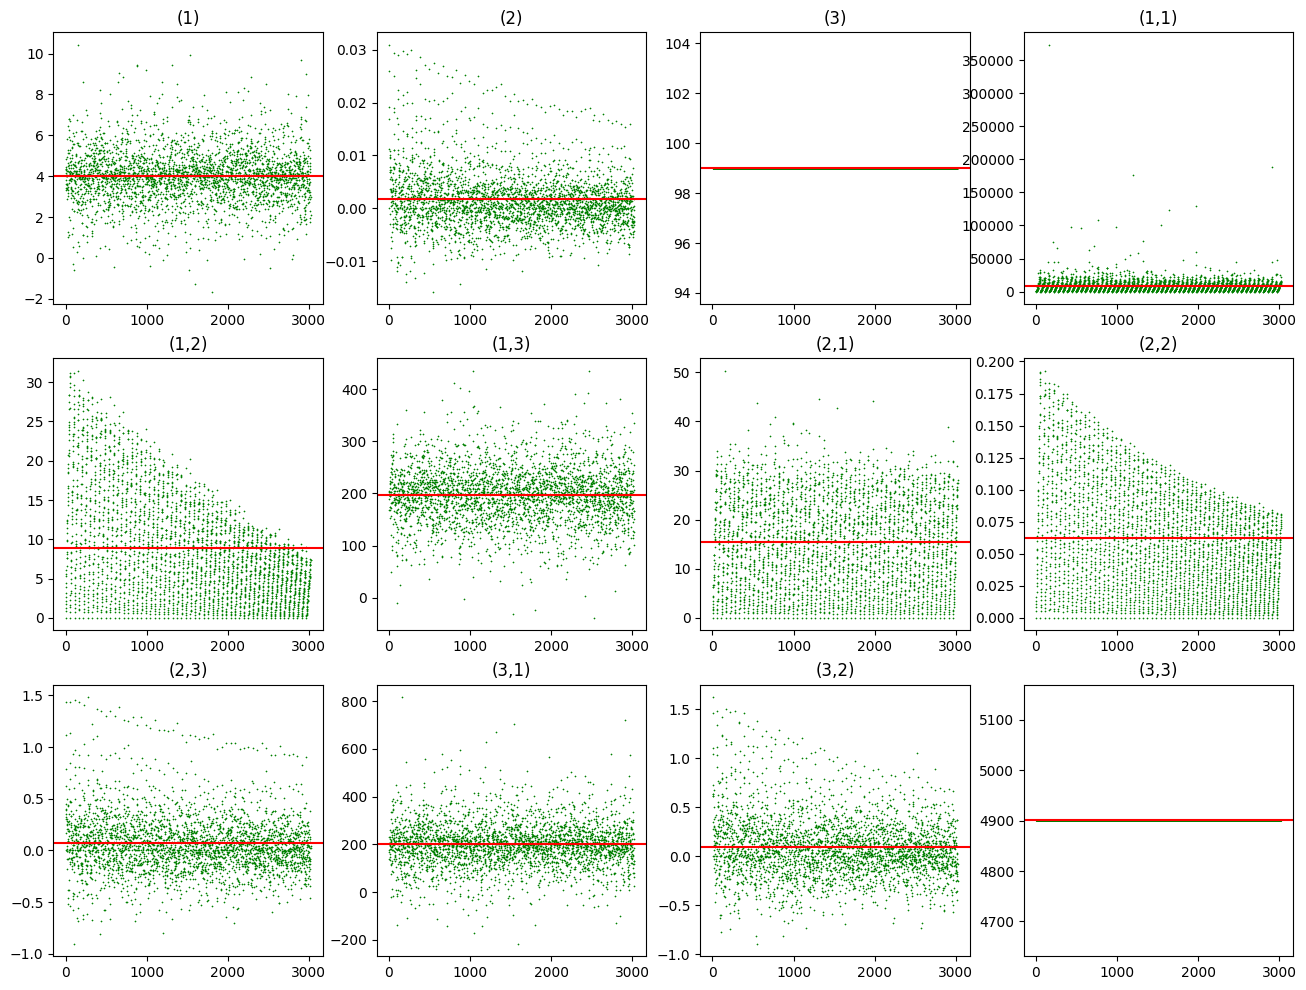

In [40]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.scatter(range(1,3026),Exp_signatures_results_rhos_and_sigmas.T[i], color='green', linewidth=0.15, s=1, alpha=1)
    ax.axhline(torch.mean(Exp_signatures_results_rhos_and_sigmas.T[i]), color='red')

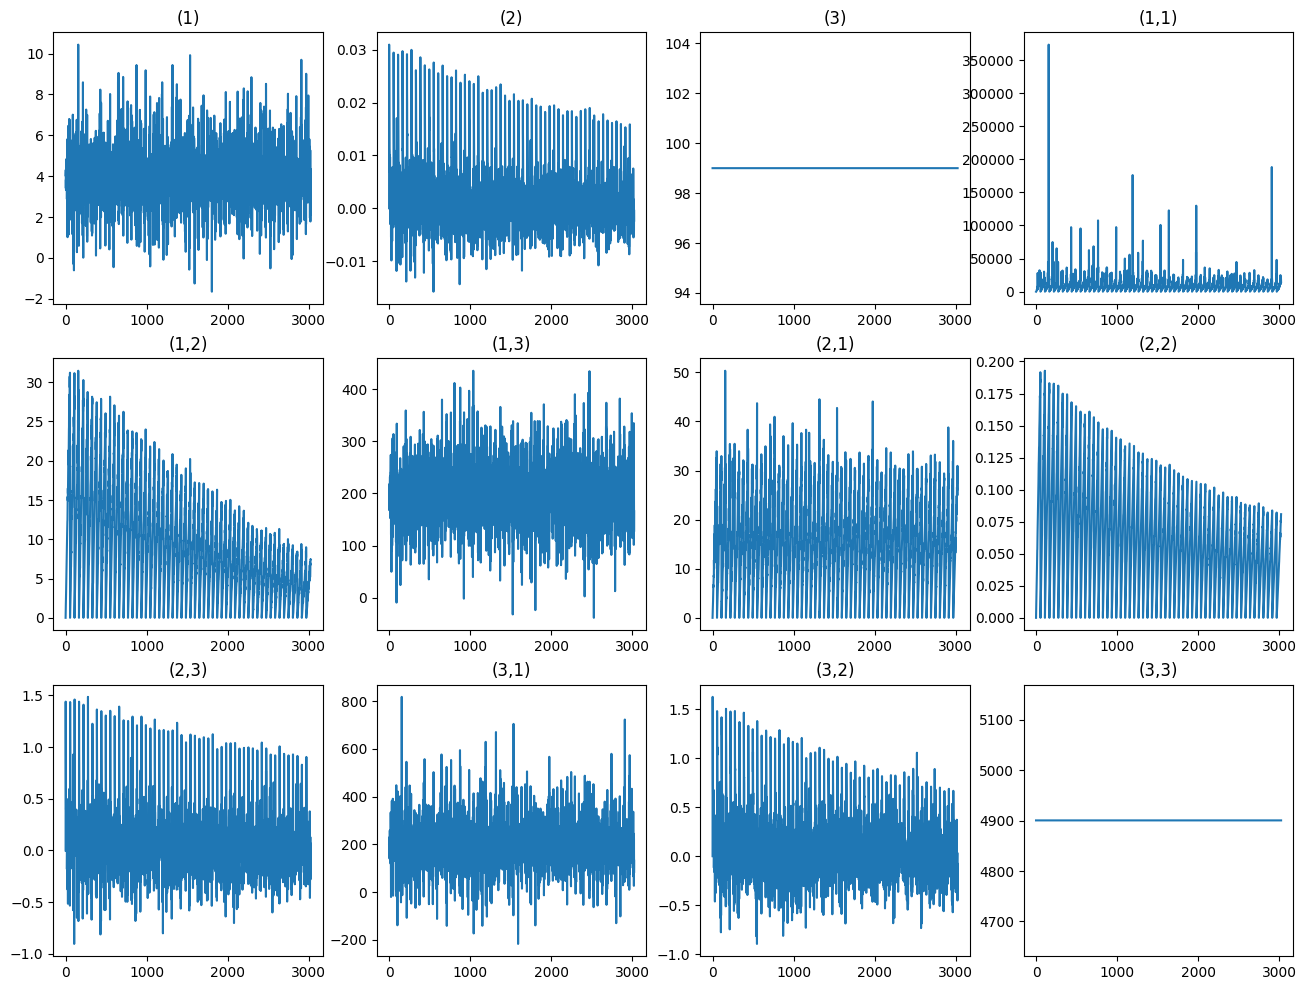

In [41]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.plot(Exp_signatures_results_rhos_and_sigmas.T[i])

In [43]:
def signatures_calculations_with_timearray(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths):
    count=0
    for kappa in by_parameter_2["by_sigmas"]:
              for theta in by_parameter_2["by_rhos"]:
                        # Caclulation of 10000 paths of prices and sigmas
                        prices_1, sigs_1 = generate_heston_paths(S, T, r, kappa, theta, theta, rho, sigma, steps, paths,
                                                                 return_vol=True)
                        for j in range(paths):
                            prices_and_sigs_with_time_tensor[j] = torch.tensor([prices_1[j], sigs_1[j], time_array]).T
                        #     shape of prices_and_sigs_witout_time_tensor=torch.Size([10000, 100, 3])

                        sign_ps_signatory_differentranges[count] = signatory.signature(prices_and_sigs_with_time_tensor, depth_of_sig)
                        #     shape of  sign_ps_signatory_differentranges=torch.Size([512, 10000, 12])

                        Exp_sign_signatory_results[count] = torch.mean(sign_ps_signatory_differentranges[count], axis=0)
                        #     shape of  Exp_sign_signatory_results=torch.Size([512, 12])

                        count = count + 1
    return sign_ps_signatory_differentranges,Exp_sign_signatory_results

In [44]:
results_sigmas_and_rhos=signatures_calculations_with_timearray(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths)
signatures_result_sigmas_and_rhos=results_sigmas_and_rhos[0]
Exp_signatures_results_sigmas_and_rhos=results_sigmas_and_rhos[1]

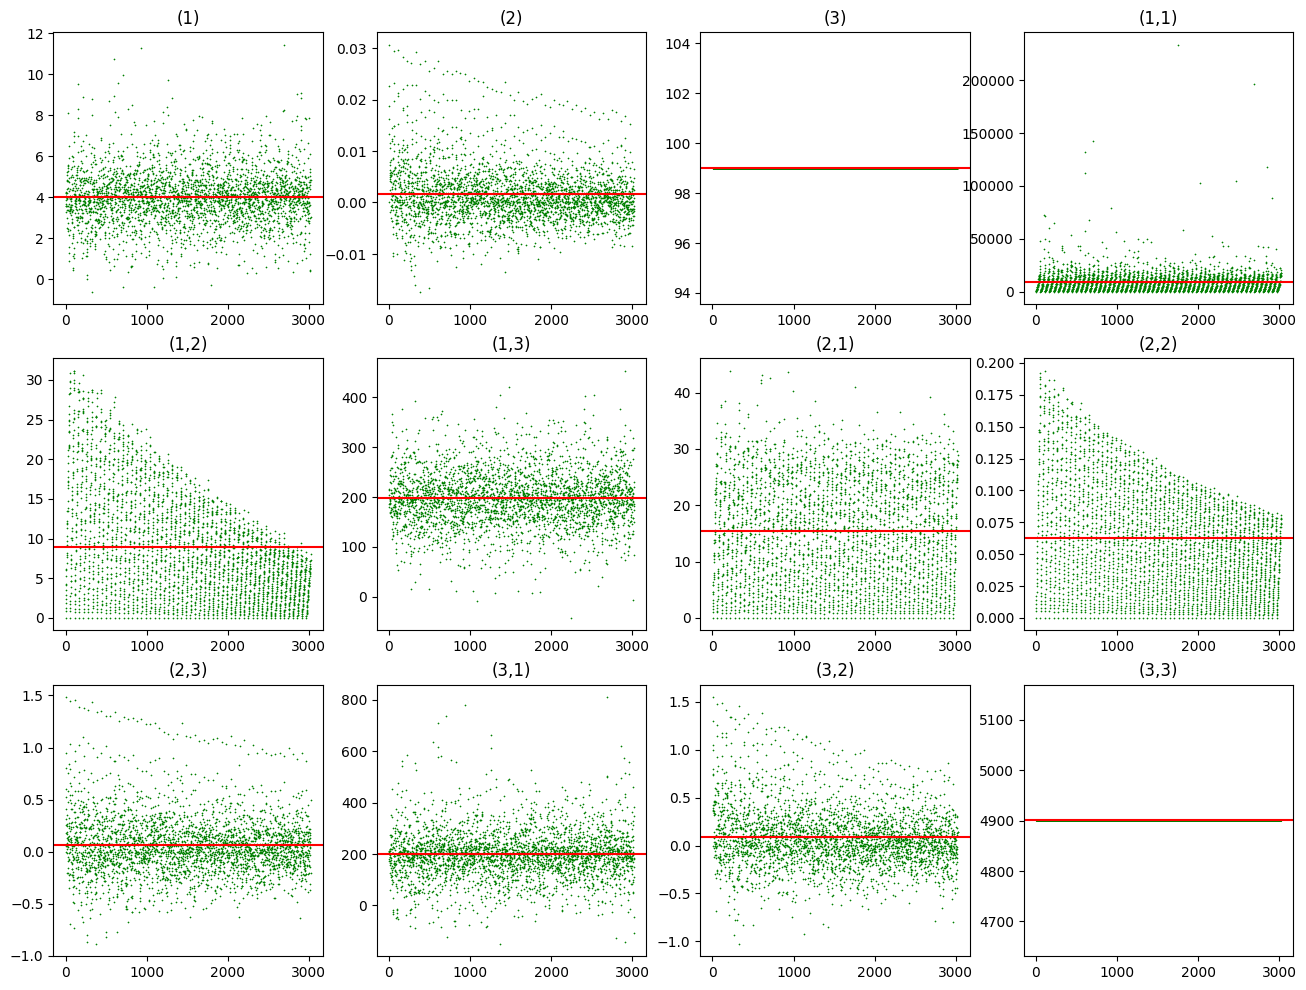

In [45]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.scatter(range(1,3026),Exp_signatures_results_sigmas_and_rhos.T[i], color='green', linewidth=0.15, s=1, alpha=1)
    ax.axhline(torch.mean(Exp_signatures_results_sigmas_and_rhos.T[i]), color='red')

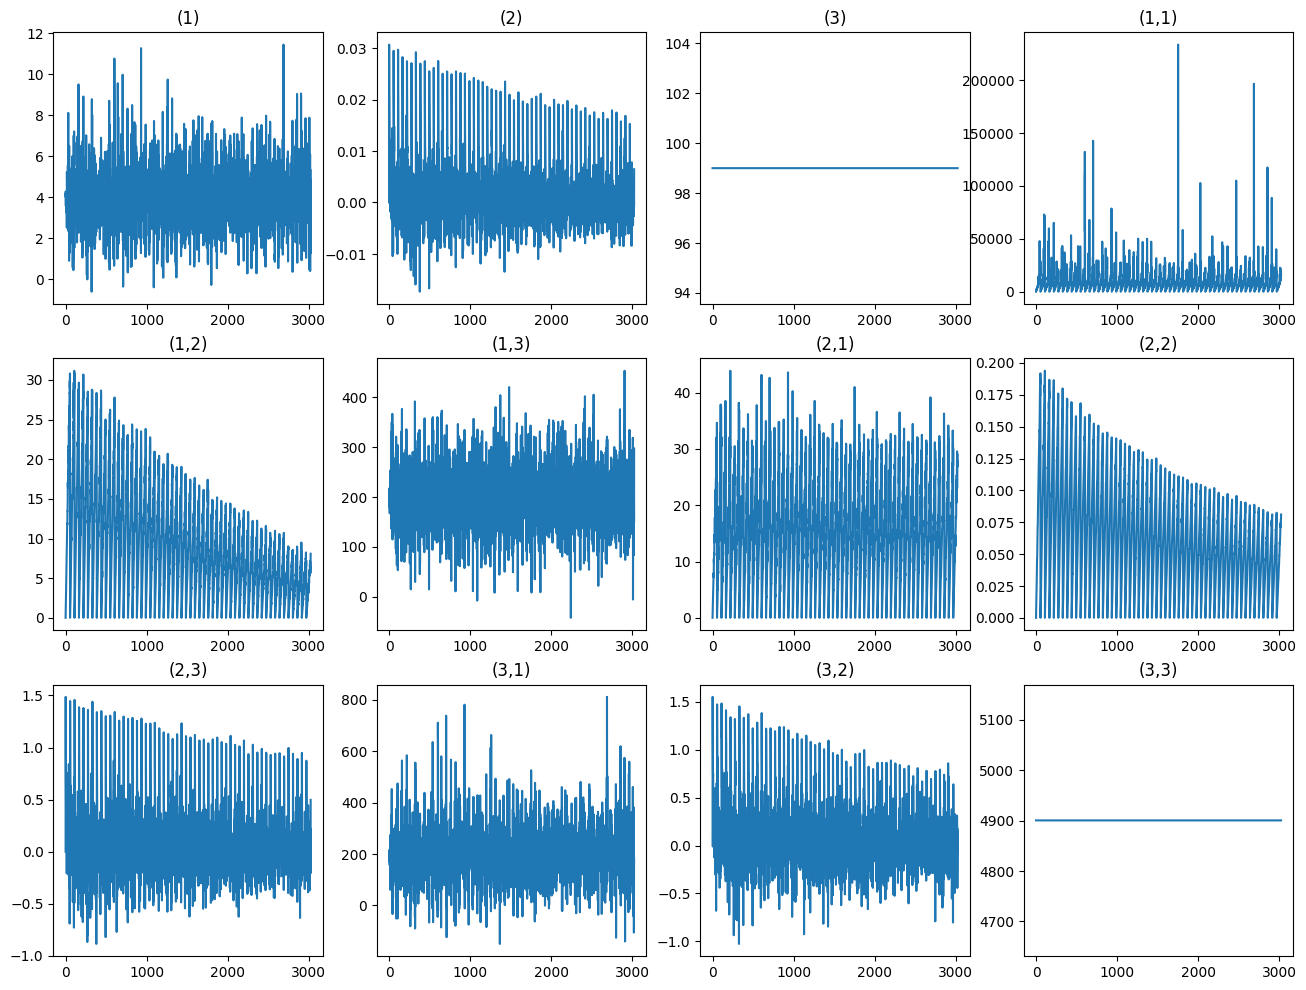

In [46]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.plot(Exp_signatures_results_sigmas_and_rhos.T[i])

In [24]:
number_of_loops=by_parameter_2["by_rhos"].shape[0]*by_parameter_2["by_thetas"].shape[0]
sign_ps_signatory_differentranges=torch.zeros((number_of_loops,paths,sig_dim))
Exp_sign_signatory_results=torch.zeros((number_of_loops,sig_dim))
sign_ps_signatory_differentranges[0].shape

torch.Size([10000, 12])

In [48]:
def signatures_calculations_with_timearray(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths):
    count=0
    for kappa in by_parameter_2["by_thetas"]:
              for theta in by_parameter_2["by_rhos"]:
                        # Caclulation of 10000 paths of prices and sigmas
                        prices_1, sigs_1 = generate_heston_paths(S, T, r, kappa, theta, theta, rho, sigma, steps, paths,
                                                                 return_vol=True)
                        for j in range(paths):
                            prices_and_sigs_with_time_tensor[j] = torch.tensor([prices_1[j], sigs_1[j], time_array]).T
                        #     shape of prices_and_sigs_witout_time_tensor=torch.Size([10000, 100, 3])

                        sign_ps_signatory_differentranges[count] = signatory.signature(prices_and_sigs_with_time_tensor, depth_of_sig)
                        #     shape of  sign_ps_signatory_differentranges=torch.Size([512, 10000, 12])

                        Exp_sign_signatory_results[count] = torch.mean(sign_ps_signatory_differentranges[count], axis=0)
                        #     shape of  Exp_sign_signatory_results=torch.Size([512, 12])

                        count = count + 1
    return sign_ps_signatory_differentranges,Exp_sign_signatory_results

In [49]:
results_thetas_and_rhos=signatures_calculations_with_timearray(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths)
signatures_result_thetas_and_rhos=results_thetas_and_rhos[0]
Exp_signatures_results_thetas_and_rhos=results_thetas_and_rhos[1]

In [52]:
Exp_signatures_results_thetas_and_rhos.T[i].shape

torch.Size([2915])

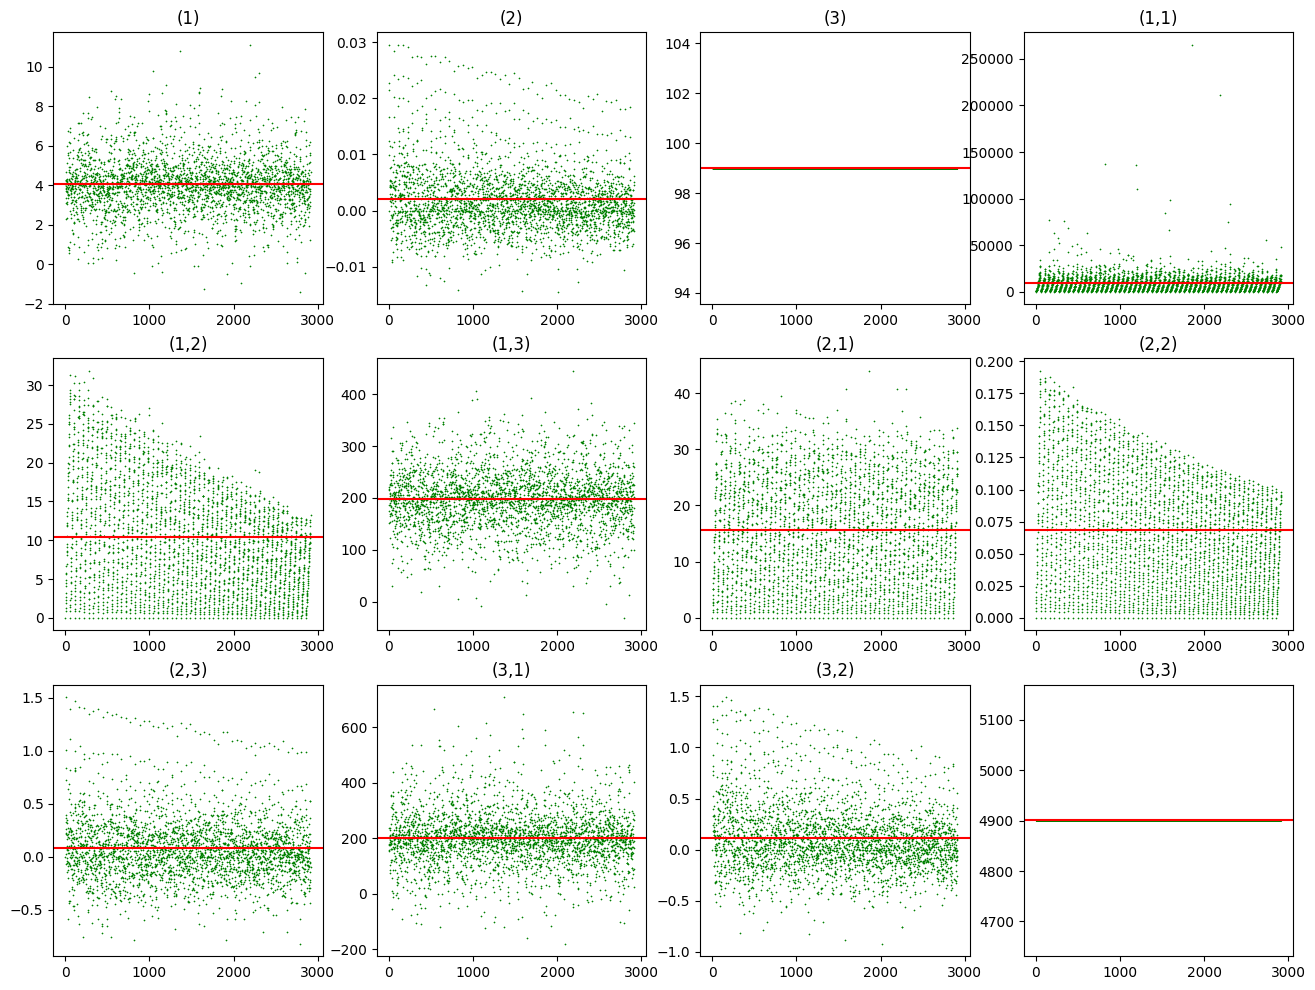

In [53]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.scatter(range(1,2916),Exp_signatures_results_thetas_and_rhos.T[i], color='green', linewidth=0.15, s=1, alpha=1)
    ax.axhline(torch.mean(Exp_signatures_results_thetas_and_rhos.T[i]), color='red')

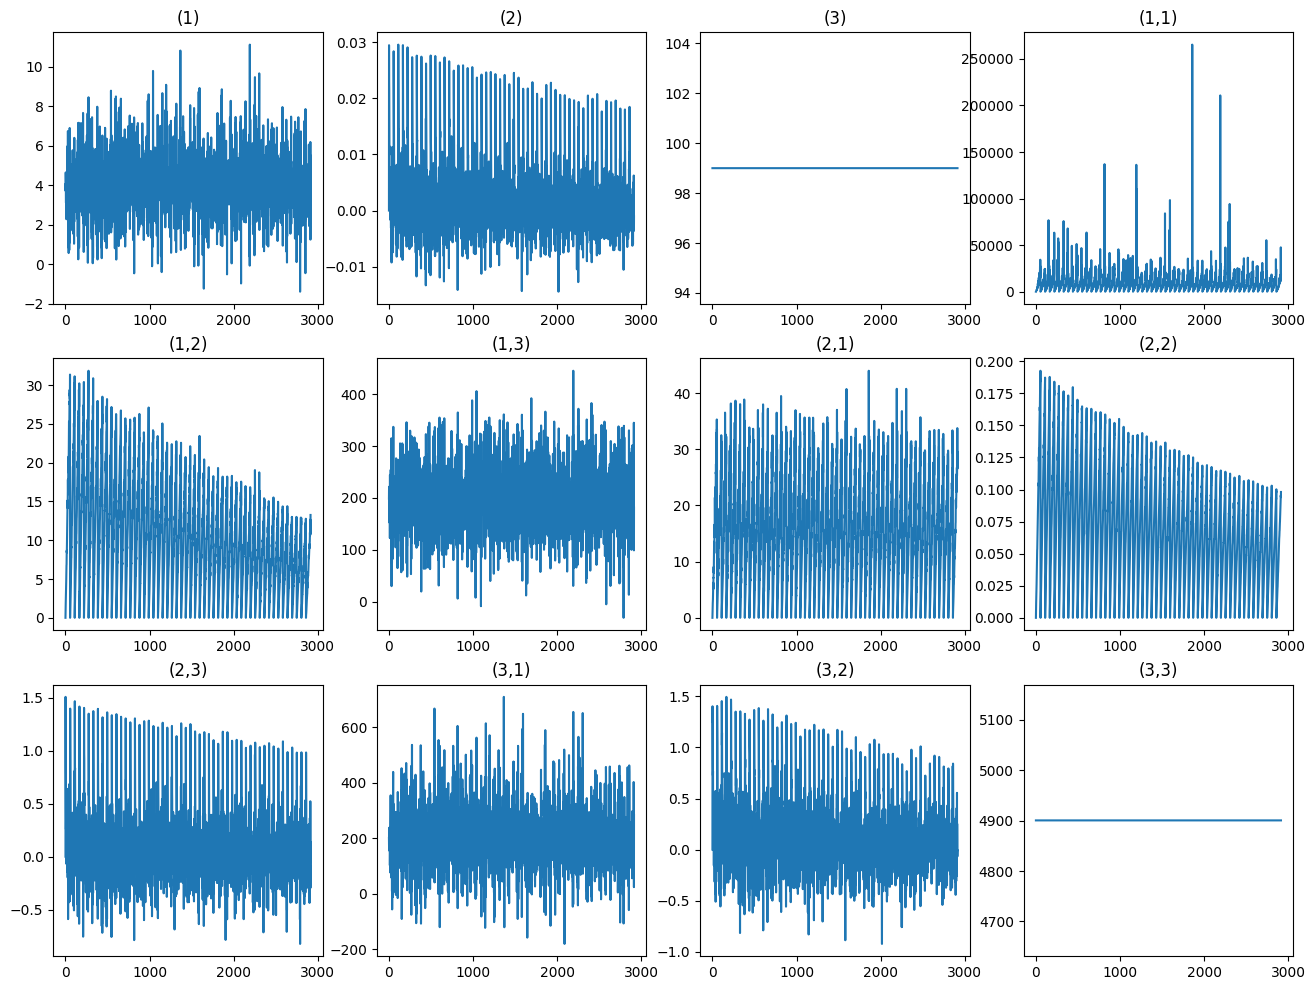

In [51]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.plot(Exp_signatures_results_thetas_and_rhos.T[i])

In [25]:
def signatures_calculations_with_timearray(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths):
    count=0
    for kappa in by_parameter_2["by_rhos"]:
              for theta in by_parameter_2["by_thetas"]:
                        # Caclulation of 10000 paths of prices and sigmas
                        prices_1, sigs_1 = generate_heston_paths(S, T, r, kappa, theta, theta, rho, sigma, steps, paths,
                                                                 return_vol=True)
                        for j in range(paths):
                            prices_and_sigs_with_time_tensor[j] = torch.tensor([prices_1[j], sigs_1[j], time_array]).T
                        #     shape of prices_and_sigs_witout_time_tensor=torch.Size([10000, 100, 3])

                        sign_ps_signatory_differentranges[count] = signatory.signature(prices_and_sigs_with_time_tensor, depth_of_sig)
                        #     shape of  sign_ps_signatory_differentranges=torch.Size([512, 10000, 12])

                        Exp_sign_signatory_results[count] = torch.mean(sign_ps_signatory_differentranges[count], axis=0)
                        #     shape of  Exp_sign_signatory_results=torch.Size([512, 12])

                        count = count + 1
    return sign_ps_signatory_differentranges,Exp_sign_signatory_results

In [26]:
results_rhos_and_thetas=signatures_calculations_with_timearray(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths)
signatures_result_rhos_and_thetas=results_rhos_and_thetas[0]
Exp_signatures_results_rhos_and_thetas=results_rhos_and_thetas[1]

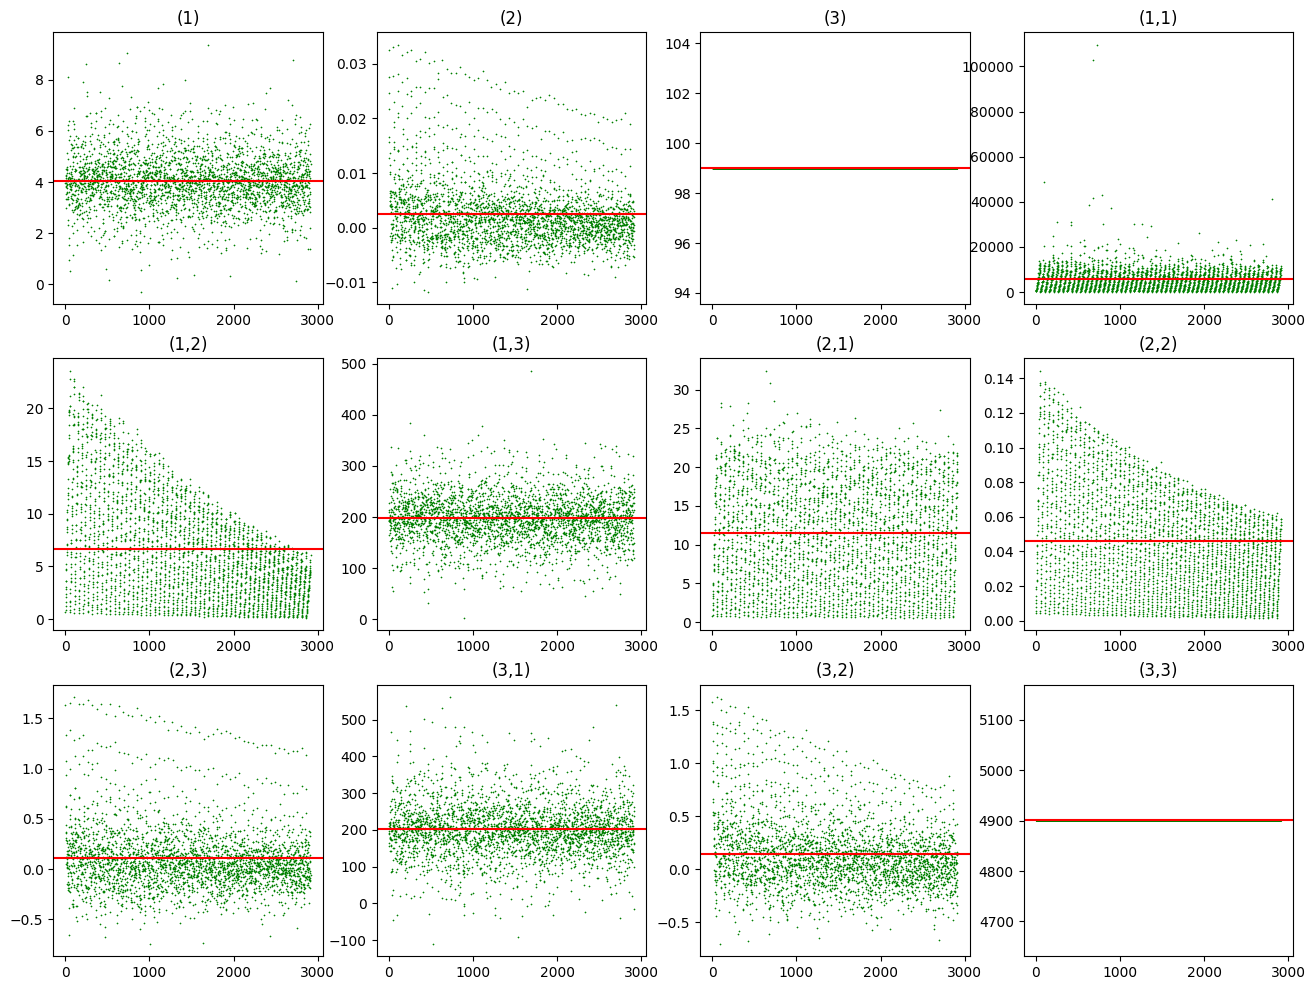

In [27]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.scatter(range(1,2916),Exp_signatures_results_rhos_and_thetas.T[i], color='green', linewidth=0.15, s=1, alpha=1)
    ax.axhline(torch.mean(Exp_signatures_results_rhos_and_thetas.T[i]), color='red')

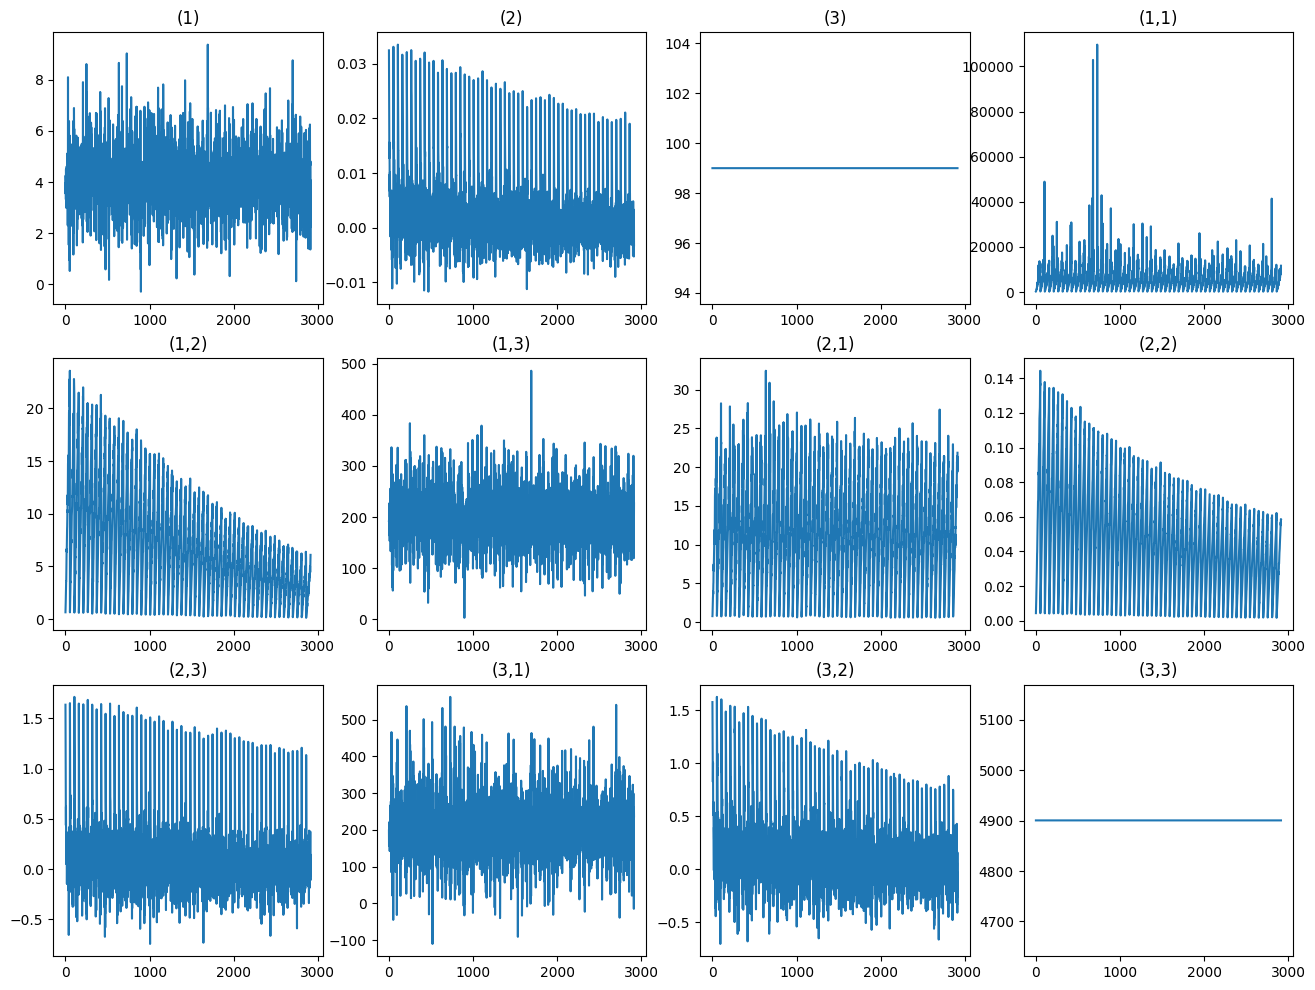

In [28]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.plot(Exp_signatures_results_rhos_and_thetas.T[i])

In [21]:
number_of_loops=by_parameter_2["by_rhos"].shape[0]*by_parameter_2["by_kappas"].shape[0]
sign_ps_signatory_differentranges=torch.zeros((number_of_loops,paths,sig_dim))
Exp_sign_signatory_results=torch.zeros((number_of_loops,sig_dim))
sign_ps_signatory_differentranges[0].shape

torch.Size([10000, 12])

In [22]:
def signatures_calculations_with_timearray(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths):
    count=0
    for kappa in by_parameter_2["by_rhos"]:
              for theta in by_parameter_2["by_kappas"]:
                        # Caclulation of 10000 paths of prices and sigmas
                        prices_1, sigs_1 = generate_heston_paths(S, T, r, kappa, theta, theta, rho, sigma, steps, paths,
                                                                 return_vol=True)
                        for j in range(paths):
                            prices_and_sigs_with_time_tensor[j] = torch.tensor([prices_1[j], sigs_1[j], time_array]).T
                        #     shape of prices_and_sigs_witout_time_tensor=torch.Size([10000, 100, 3])

                        sign_ps_signatory_differentranges[count] = signatory.signature(prices_and_sigs_with_time_tensor, depth_of_sig)
                        #     shape of  sign_ps_signatory_differentranges=torch.Size([512, 10000, 12])

                        Exp_sign_signatory_results[count] = torch.mean(sign_ps_signatory_differentranges[count], axis=0)
                        #     shape of  Exp_sign_signatory_results=torch.Size([512, 12])

                        count = count + 1
    return sign_ps_signatory_differentranges,Exp_sign_signatory_results

In [23]:
results_rhos_and_kappas=signatures_calculations_with_timearray(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths)
signatures_result_rhos_and_kappas=results_rhos_and_kappas[0]
Exp_signatures_results_rhos_and_kappas=results_rhos_and_kappas[1]

In [25]:
Exp_signatures_results_rhos_and_kappas.T[i].shape

torch.Size([2475])

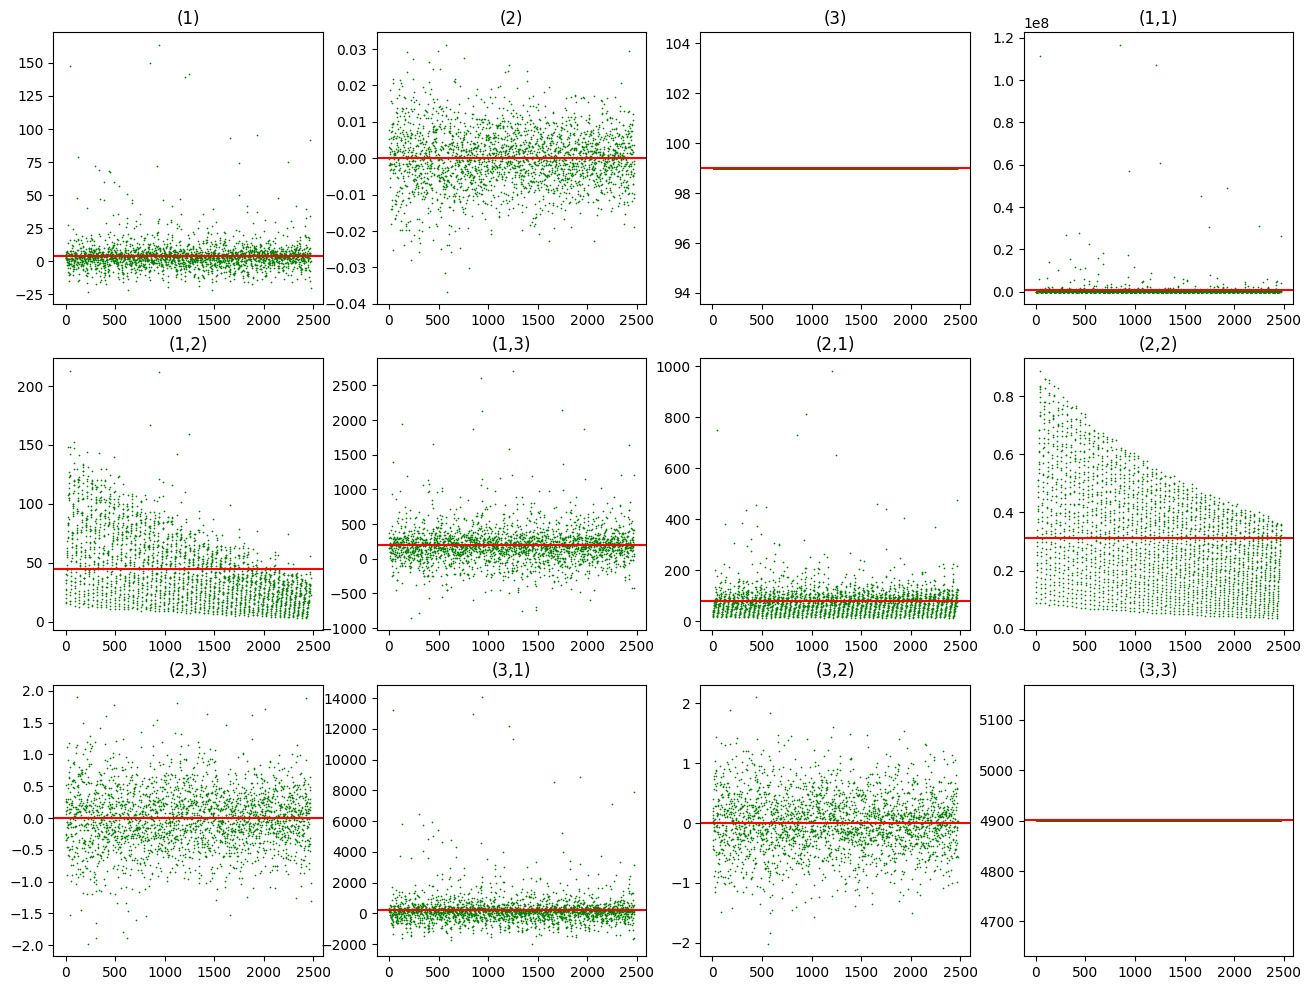

In [26]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.scatter(range(1,2476),Exp_signatures_results_rhos_and_kappas.T[i], color='green', linewidth=0.15, s=1, alpha=1)
    ax.axhline(torch.mean(Exp_signatures_results_rhos_and_kappas.T[i]), color='red')

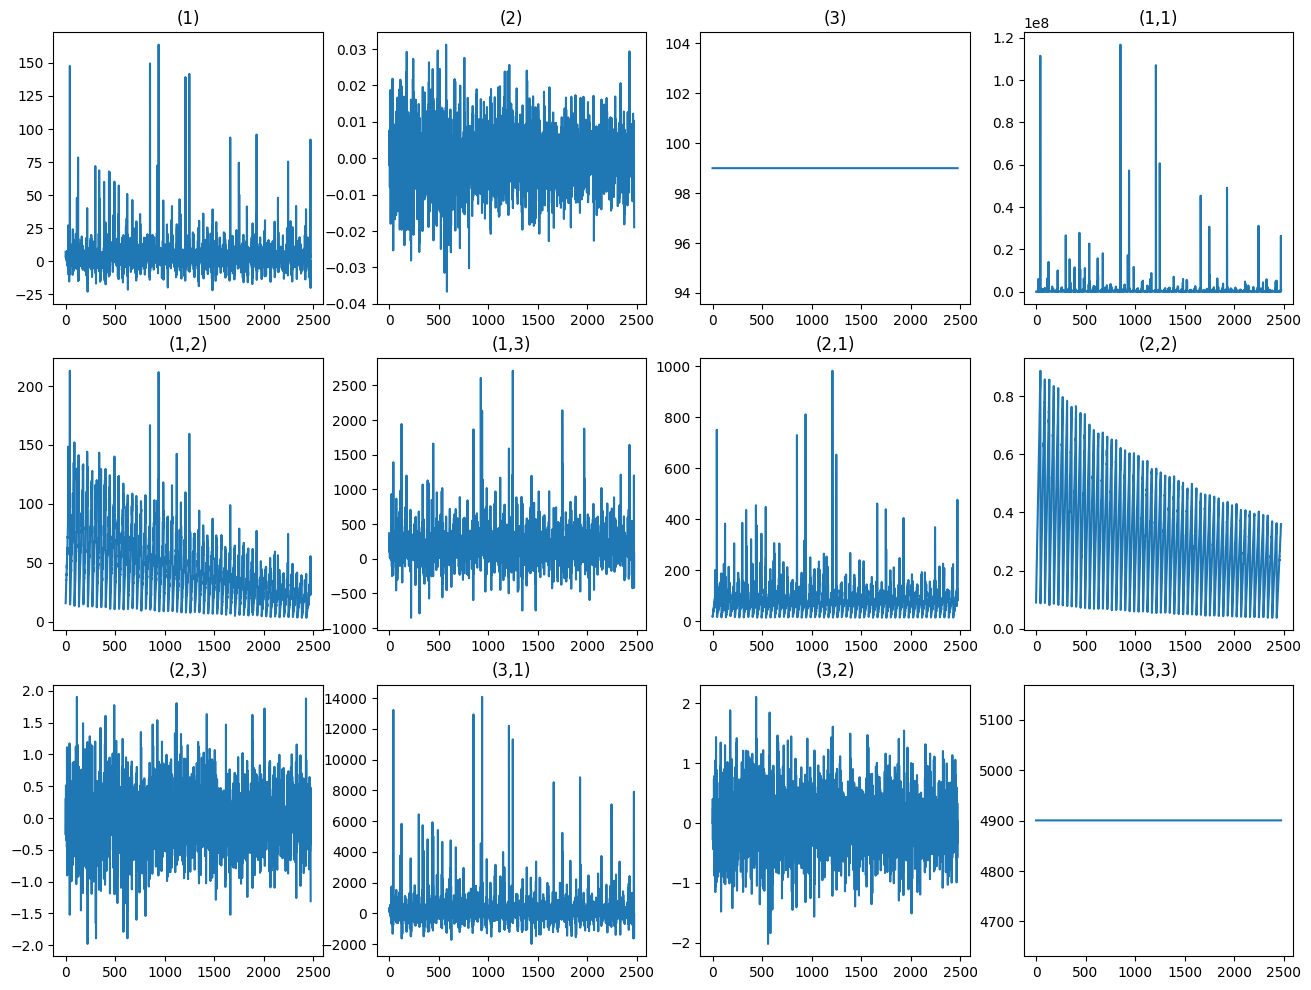

In [27]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.plot(Exp_signatures_results_rhos_and_kappas.T[i])

In [31]:
def signatures_calculations_with_timearray(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths):
    count=0
    for kappa in by_parameter_2["by_kappas"]:
              for theta in by_parameter_2["by_rhos"]:
                        # Caclulation of 10000 paths of prices and sigmas
                        prices_1, sigs_1 = generate_heston_paths(S, T, r, kappa, theta, theta, rho, sigma, steps, paths,
                                                                 return_vol=True)
                        for j in range(paths):
                            prices_and_sigs_with_time_tensor[j] = torch.tensor([prices_1[j], sigs_1[j], time_array]).T
                        #     shape of prices_and_sigs_witout_time_tensor=torch.Size([10000, 100, 3])

                        sign_ps_signatory_differentranges[count] = signatory.signature(prices_and_sigs_with_time_tensor, depth_of_sig)
                        #     shape of  sign_ps_signatory_differentranges=torch.Size([512, 10000, 12])

                        Exp_sign_signatory_results[count] = torch.mean(sign_ps_signatory_differentranges[count], axis=0)
                        #     shape of  Exp_sign_signatory_results=torch.Size([512, 12])

                        count = count + 1
    return sign_ps_signatory_differentranges,Exp_sign_signatory_results

In [32]:
results_kappas_and_rhos=signatures_calculations_with_timearray(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths)
signatures_result_kappas_and_rhos=results_kappas_and_rhos[0]
Exp_signatures_results_kappas_and_rhos=results_kappas_and_rhos[1]

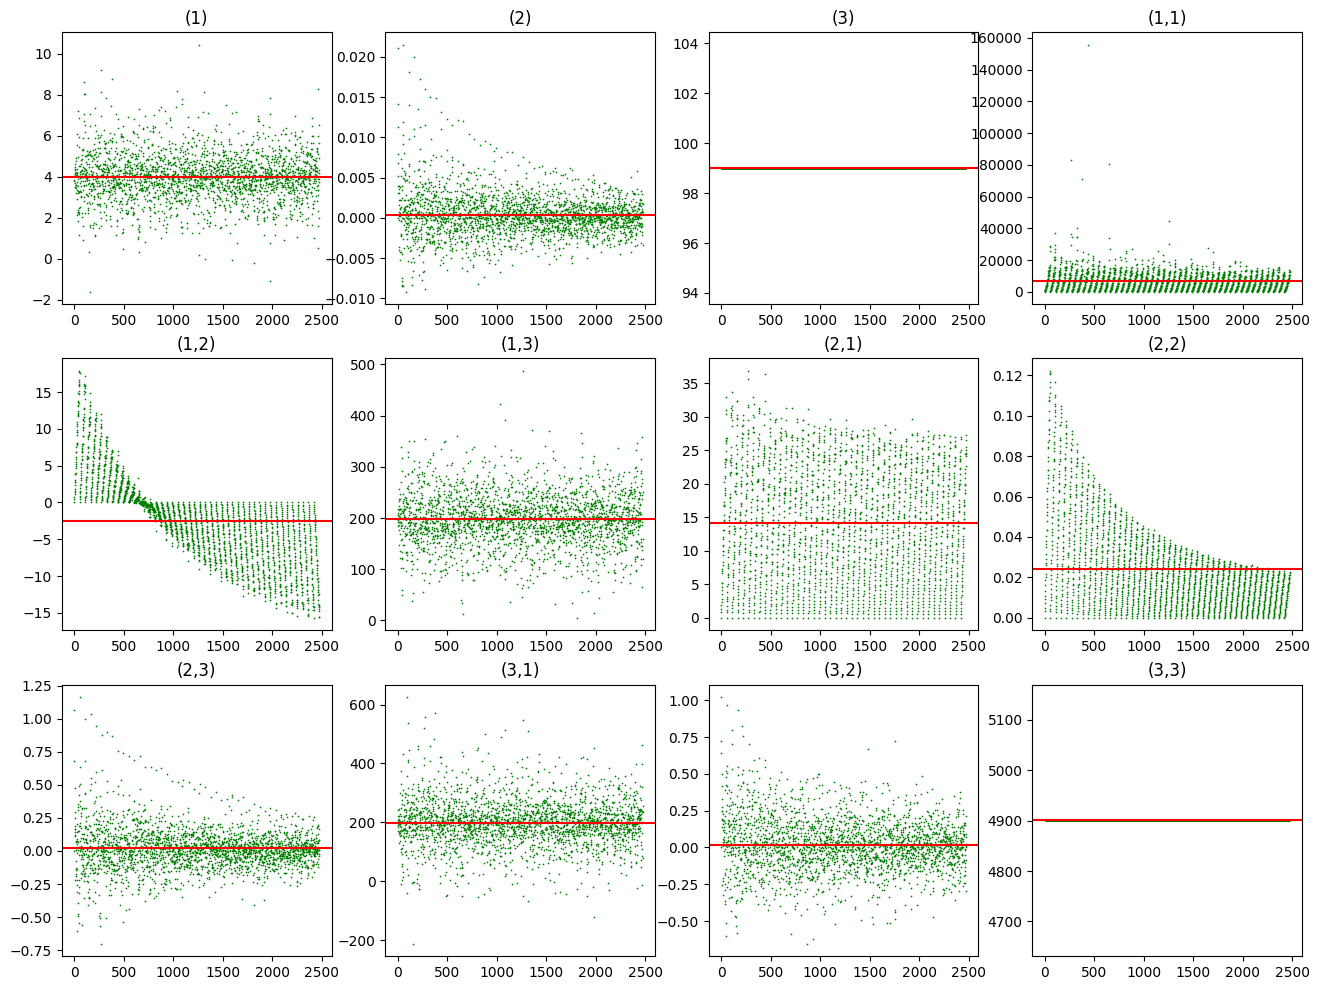

In [33]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.scatter(range(1,2476),Exp_signatures_results_kappas_and_rhos.T[i], color='green', linewidth=0.15, s=1, alpha=1)
    ax.axhline(torch.mean(Exp_signatures_results_kappas_and_rhos.T[i]), color='red')

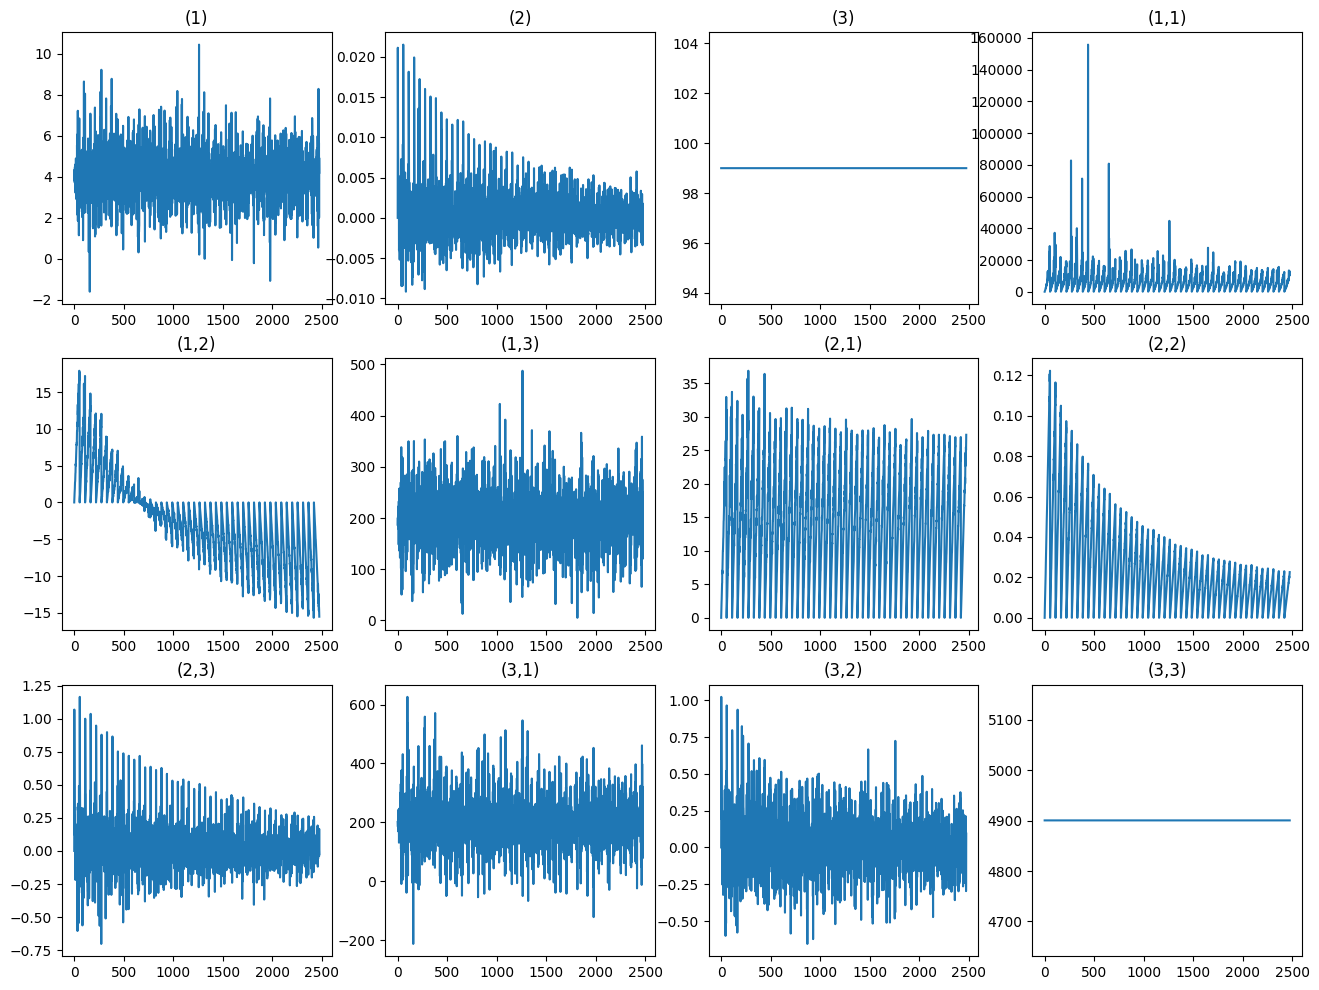

In [34]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.plot(Exp_signatures_results_kappas_and_rhos.T[i])